# API 221 Final Project

## Introduction + Motivation

One of the most direct ways citizens and police officers interact is through police stops. Police stops may seem like a minor interaction but they can both impact citizens through fines and attitudes about policing. 

In [2]:
import sys
sys.path.append("/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
pd.options.display.max_columns = 100

import csv
# import os 
# os.chdir('/Users/awickett/Documents/G2/Classes/AC221/')
# dir="/Users/awickett/Documents/G2/Classes/AC221/"

In [3]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")


In [4]:
# %cd data

/Users/jessica/Documents/AC221/finalproject/data


In [4]:
# from fuzzywuzzy import fuzz
# from fuzzywuzzy import process


## Data Collection

We have 2 main dataset, Voter Registration data and Police Stop data. 
- Voter Registration data -  there are 3 files for this data:
    - Polk County Voter Registration data (contains both Republic and Democrat voters)
    - Hillborough County Republic Voter Registration Data 
    - Hillborough County Democrat Voter Registration Data 
- Police Stop data (2017-2019) - there are 3 files for this data, one for each year

### Preprocessing Voters data



The code below was used to de-duplicate any lines (person) in the csv file, based on the unique full name of the person. We used column 1-4 to be the unique key (Last_Name, First_Name, Middle_Name, and Suffix) that was saved to a `set` and then removed any duplicated rows (person with the same Last_Name, First_Name, Middle_Name, and Suffix).


We then preprocess the names into the 5 naming convention as well:
- first and last name
- first, last, middle name
- first, last, middle initial
- first, last, middle name and suffix
- first, last, middle initial and suffix

We also extract the data about the political party affiliation, race, and gender for each row. We then assemble all this information in the form of a dictionary (which was later converted to dataframe for analysis e.g. merging/goruping/plotting).

This process is done for each of the 3 files we have (Polk Voters, Hillsborough Republic voters, and Hillsborough Democrat voters data).


### 1. Polk County Voters Data

In [5]:
First_Name = []
Last_Name = []
Middle_Name = []
Suffixes = []
Parties = []
Race=[]
Gender=[]
# 5 format of names (for later merging)
First_Lasts = []
First_Lasts_Middle = []
First_Lasts_MiddleInit = []
First_Lasts_Middle_Suffix = []
First_Lasts_MiddleInit_Suffix = []

list_party = ['NPA', 'DEM', 'REP', 'IND', 'LPF', 'GRE', 'REF', 'CPF', 'ECO', 'PSL']
with open("Voters.csv", "r") as cin:
    names_seen = set()
    unique_lines = 0
    total_lines = 0
    
    csvReader = csv.reader(cin, delimiter=',')
    for k, row in enumerate(csvReader):
            
        #skip line if it's header
        if k > 0: 
            total_lines += 1
            # col 0: voterID; col1: Last_name, col2: First_Name, col3: Middle_Name, col4:suffix
            last=row[1]
            first=row[2]
            middle=row[3]
            suffix =row[4]
            
            # we want to create a variable that store the names in these 5 formats
            first_last = last + ", " + first
            
            # if middle name exists
            if middle != '':
                first_last_middle = first_last + " " + middle
                first_last_middleinit = first_last + " " + middle[0]
            else:
                first_last_middle = first_last 
                first_last_middleinit = first_last 
                
            # if suffix exists    
            if suffix != '':
                first_last_middle_suffix = first_last_middle + ", "+ suffix
                first_last_middleinit_suffix = first_last_middleinit + ", "+ suffix
            else:
                first_last_middle_suffix = first_last_middle
                first_last_middleinit_suffix = first_last_middleinit
                
            first_last = first_last.lower()
            first_last_middle = first_last_middle.lower()
            first_last_middleinit = first_last_middleinit.lower()
            first_last_middle_suffix = first_last_middle_suffix.lower()
            first_last_middleinit_suffix = first_last_middleinit_suffix.lower()
            
            # 5th col from the end is the party 
            party = row[-5].upper()
            race=row[11]
            gender=row[12]
            if first_last_middle_suffix not in names_seen and party in list_party:
                names_seen.add(first_last_middle_suffix)
                unique_lines += 1
                
                First_Name.append(first)
                Last_Name.append(last)
                Middle_Name.append(middle)
                Suffixes.append(suffix)
                Parties.append(party)
                First_Lasts.append(first_last)
                First_Lasts_Middle.append(first_last_middle)
                First_Lasts_MiddleInit.append(first_last_middleinit)
                First_Lasts_Middle_Suffix.append(first_last_middle_suffix)
                First_Lasts_MiddleInit_Suffix.append(first_last_middleinit_suffix)
                Race.append(race)
                Gender.append(gender)
            else:
                print(k,row,'\n')
    
print("total lines:", str(total_lines), "\nunique lines:",str(unique_lines))
# total lines: 450787 
# unique lines: 445146

# dicitionary to assemble the data
polk_voter = {'Last_Name': Last_Name, 'First_Name':First_Name, 'Middle_Name': Middle_Name, 
              'Suffix':Suffixes, 'Party': Parties, 'first_last':First_Lasts, 
              'first_last_middle':First_Lasts_Middle, 'first_last_middleinit':First_Lasts_MiddleInit, 
              'first_last_middle_suffix':First_Lasts_Middle_Suffix, 'first_last_middleinit_suffix':First_Lasts_MiddleInit_Suffix,
              "race_voter":Race, "gender_voter":Gender}

# convert dictionary to dataframe for later analysis
polk_voter2 = pd.DataFrame(polk_voter)



318 ['107590037', 'Abel', 'Charles', 'Owens', '', '320 WGTO Tower Rd', 'Lake Alfred FL', '33850', '320 WGTO Tower Rd', 'Lake Alfred', '33850', '5', 'M', '6/14/1962', '10/11/2005', '9', 'REP', '306', '41', '22', '3'] 

919 ['124146357', 'Acevedo', 'Carmen', '', '', '3034 Fort Socrum Village Blvd', 'Lakeland FL', '33810', '3034 Fort Socrum Village Blvd', 'Lakeland', '33810', '9', 'F', '6/18/1951', '10/3/2016', '15', 'Dem', '109', '39', '20', '5'] 

941 ['113710777', 'Acevedo', 'Efrain', '', '', '5539 Bloomfield Blvd', 'Lakeland FL', '33810-0000', '5539 Bloomfield Blvd', 'Lakeland', '33810-0000', '4', 'M', '7/23/1944', '8/11/2000', '15', 'DEM', '119', '40', '20', '5'] 

944 ['113808305', 'Acevedo', 'Elizabeth', '', '', '6303 Red Herring Dr', 'Winter Haven FL', '33881', '6303 Red Herring Dr', 'Winter Haven', '33881', '4', 'F', '7/24/1961', '6/30/2004', '9', 'NPA', '313', '41', '22', '3'] 

954 ['120462030', 'Acevedo', 'Francisco', '', '', '509 Cipres Cir', 'Winter Haven FL', '33880', '509 

18430 ['120616463', 'Baguio', 'Billy', '', '', '1972 White Hawk Way', 'Winter Haven FL', '33881', '1972 White Hawk Way', 'Winter Haven', '33881', '2', 'U', '3/11/1961', '12/7/2012', '9', 'NPA', '326', '41', '22', '4'] 

18585 ['116745079', 'Bailey', 'Brian', 'Scott', '', '4386 Whistlewood Cir', 'Lakeland FL', '33811', '4386 Whistlewood Cir', 'Lakeland', '33811', '5', 'M', '2/11/1972', '9/12/2008', '15', 'REP', '220', '40', '22', '1'] 

18654 ['113527476', 'Bailey', 'David', 'L', '', '904 Brookwood Dr', 'Lakeland FL', '33813', '904 Brookwood Dr', 'Lakeland', '33813', '5', 'M', '6/19/1947', '10/8/1990', '15', 'NPA', '235', '40', '22', '1'] 

18789 ['106235281', 'Bailey', 'Joseph', 'H', '', '618 Key West Ave', 'Davenport FL', '33897', '618 Key West Ave', 'Davenport', '33897', '5', 'M', '11/18/1972', '9/28/2000', '15', 'REP', '105', '39', '22', '4'] 

18837 ['114761703', 'Bailey', 'Linda', 'Lee', '', '1809 Challenger Ave', 'Davenport FL', '33897', '1809 Challenger Ave', 'Davenport', '33897


38193 ['113774895', 'Bonilla', 'Daniel', '', '', '6541 Evergreen Park Dr', 'Lakeland FL', '33813', '6541 Evergreen Park Dr', 'Lakeland', '33813', '4', 'M', '10/10/1937', '4/24/2003', '17', 'DEM', '248', '56', '26', '1'] 

38212 ['124491192', 'Bonilla', 'Jason', '', '', '901 Murcott ST', 'Lakeland FL', '33803-1982', '901 Murcott ST', 'Lakeland', '33803-1982', '4', 'M', '1/3/1976', '12/29/2016', '15', 'DEM', '222', '40', '22', '1'] 

38221 ['119344715', 'Bonilla', 'Jonathan', '', '', '307 Erie Ct', 'Kissimmee FL', '34759', '307 Erie Ct', 'Kissimmee', '34759', '4', 'M', '8/12/1989', '1/4/2012', '9', 'REP', '419', '42', '22', '4'] 

38222 ['124704635', 'Bonilla', 'Jonathan', '', '', '314 Avenue I SE', 'Winter Haven FL', '33880', '314 Avenue I SE', 'Winter Haven', '33880', '4', 'M', '6/18/1986', '4/12/2017', '9', 'NPA', '330', '41', '22', '3'] 

38226 ['123441892', 'Bonilla', 'Jose', 'Juan', '', '2910 Masterpiece Rd', 'Lake Wales FL', '33898', '2910 Masterpiece Rd', 'Lake Wales', '33898', 

55360 ['113459664', 'Butler', 'Michael', 'Patrick', '', '5650 Bloomfield Blvd', 'Lakeland FL', '33810', '5650 Bloomfield Blvd', 'Lakeland', '33810', '5', 'M', '2/26/1950', '9/26/1977', '15', 'REP', '119', '40', '20', '5'] 

55476 ['113502595', 'Butler', 'Walter', 'S', '', '1096 Idylwild Dr NW', 'Winter Haven FL', '33881-1148', '1096 Idylwild Dr NW', 'Winter Haven', '33881-1148', '5', 'M', '9/9/1946', '3/4/1987', '9', 'DEM', '319', '41', '22', '3'] 

55921 ['113813732', 'Byrd', 'Christopher', 'Lee', '', '3449 Sleepy Hill Oaks St', 'Lakeland FL', '33810', '3449 Sleepy Hill Oaks St', 'Lakeland', '33810', '3', 'M', '10/30/1964', '8/9/2004', '15', 'DEM', '118', '40', '20', '5'] 

56114 ['127623924', 'Byrd', 'William', 'Joseph', 'JR', '10202 Slaughterhouse Rd', 'Polk City FL', '33868', '10202 Slaughterhouse Rd', 'Polk City', '33868', '5', 'M', '10/20/1988', '11/22/2019', '15', 'Rep', '107', '39', '22', '3'] 

56178 ['106182024', 'Byron', 'John', 'T', '', '1260 Las Brisas Ln', 'Winter Haven F

76223 ['120386656', 'Coker', 'Kimberly', 'Ann', '', '4799 Williamstown BLVD', 'Lakeland FL', '33810', '4799 Williamstown BLVD', 'Lakeland', '33810', '5', 'F', '1/27/1965', '10/1/2012', '15', 'NPA', '112', '40', '22', '5'] 

76354 ['127937427', 'Colding', 'Clemeth', 'Dale', '', '63 Grape Hammock Park', 'Lake Wales FL', '33898', '63 Grape Hammock Park', 'Lake Wales', '33898', '5', 'M', '2/21/1950', '2/18/2020', '9', 'REP', '540', '42', '26', '2'] 

76491 ['127304373', 'Cole', 'James', 'Edward', '', '89 Morganthau Dr', 'Lakeland FL', '33813', '89 Morganthau Dr', 'Lakeland', '33813', '5', 'M', '2/18/1944', '10/14/2019', '15', 'REP', '239', '40', '26', '1'] 

76551 ['113728838', 'Cole', 'Mary', 'Louise', '', '5130 Alt Bab Pk Cut Off Rd LOT 20', 'Lake Wales FL', '33859', '5130 Alt Bab Pk Cut Off Rd LOT 20', 'Lake Wales', '33859', '5', 'F', '5/14/1939', '4/24/2001', '17', 'DEM', '514', '56', '26', '2'] 

76674 ['128034962', 'Coleman', 'Anna', 'Elisabeth', '', '421 Windsor St', 'Lakeland FL', 

89516 ['122469847', 'Cruz', 'Jose', 'Luis', '', '19 Ohara Dr', 'Haines City FL', '33844', '19 Ohara Dr', 'Haines City', '33844', '4', 'M', '10/31/1968', '4/24/2015', '9', 'NPA', '306', '41', '22', '3'] 

89517 ['122105981', 'Cruz', 'Jose', 'Luis', '', '185 Bluff Rd', 'Mulberry FL', '33860', '185 Bluff Rd', 'Mulberry', '33860', '4', 'M', '7/19/1955', '11/4/2014', '17', 'DEM', '247', '56', '26', '2'] 

89524 ['110557921', 'Cruz', 'Jose', '', '', '8727 Conoy Ave', 'Polk City FL', '33868-6023', '8727 Conoy Ave', 'Polk City', '33868-6023', '4', 'M', '12/13/1946', '2/27/1991', '15', 'Dem', '107', '39', '22', '5'] 

89536 ['113590214', 'Cruz', 'Juan', 'A', '', '554 Goldenrod Cir N', 'Auburndale FL', '33823-5831', '554 Goldenrod Cir N', 'Auburndale', '33823-5831', '4', 'M', '10/5/1948', '4/7/1995', '15', 'DEM', '208', '39', '22', '5'] 

89537 ['113804546', 'Cruz', 'Juan', 'A', '', '455 Gannet Ct', 'Kissimmee FL', '34759', '455 Gannet Ct', 'Kissimmee', '34759', '4', 'M', '6/3/1946', '6/8/2004',

103816 ['126537740', 'Diaz', 'Alberto', '', '', '215 Maui Ave', 'Davenport FL', '33897', '215 Maui Ave', 'Davenport', '33897', '4', 'M', '4/7/1953', '1/2/2019', '15', 'REP', '103', '39', '22', '4'] 

103821 ['124033210', 'Diaz', 'Alex', '', '', '728 Camel Ct', 'Kissimmee FL', '34759', '728 Camel Ct', 'Kissimmee', '34759', '4', 'M', '5/25/1982', '9/12/2016', '9', 'Dem', '412', '42', '22', '4'] 

103858 ['109171439', 'Diaz', 'Angela', '', '', '4711 Senander Cres', 'Lakeland FL', '33810-3724', '4711 Senander Cres', 'Lakeland', '33810-3724', '4', 'F', '3/13/1930', '12/10/1980', '15', 'REP', '112', '40', '22', '5'] 

103872 ['125262610', 'Diaz', 'Antonio', '', '', '611 Koala Ct', 'Kissimmee FL', '34759', '611 Koala Ct', 'Kissimmee', '34759', '4', 'M', '12/15/1945', '2/27/2018', '9', 'DEM', '412', '42', '22', '4'] 

103891 ['103113343', 'Diaz', 'Barbara', 'Luz', '', '4703 Hickory Stream Ln', 'Mulberry FL', '33860', '4703 Hickory Stream Ln', 'Mulberry', '33860', '4', 'F', '12/12/1972', '7/23/

116971 ['115751580', 'Elliott', 'Donna', 'J', '', '6084 Sandpipers Dr', 'Lakeland FL', '33809', '6084 Sandpipers Dr', 'Lakeland', '33809', '5', 'F', '5/5/1933', '12/11/2007', '15', 'REP', '117', '39', '22', '5'] 

117400 ['113615885', 'Ellis', 'Michael', '', '', '4245 Tiger Creek Trl', 'Lake Wales FL', '33898', '4245 Tiger Creek Trl', 'Lake Wales', '33898', '5', 'M', '12/7/1959', '2/28/1996', '9', 'NPA', '533', '42', '26', '2'] 

117475 ['113565437', 'Ellis', 'Susan', 'L', '', '5767 Manchester Dr E', 'Lakeland FL', '33810-6243', '5767 Manchester Dr E', 'Lakeland', '33810-6243', '5', 'F', '9/11/1942', '1/15/1993', '15', 'REP', '119', '40', '20', '5'] 

117484 ['113460478', 'Ellis', 'Terry', 'Lynn', '', 'PO BOX 8917', 'LAKELAND FL', '33806', '410 W Palm Dr', 'Lakeland', '33803', '1', 'F', '6/27/1950', '3/15/1978', '15', 'REP', '228', '40', '22', '1'] 

117685 ['126622046', 'Elms', 'Keith', 'William', '', '6549 Shepherd Oaks RD', 'Lakeland FL', '33811', '6549 Shepherd Oaks RD', 'Lakeland'

137859 ['113793816', 'Gallagher', 'Michael', 'A', '', '5228 Bloomfield Blvd', 'Lakeland FL', '33810', '5228 Bloomfield Blvd', 'Lakeland', '33810', '5', 'M', '6/15/1945', '2/4/2004', '15', 'DEM', '119', '40', '20', '5'] 

138415 ['120148336', 'Gamez', 'Geronimo', '', 'JR', '79 Yale Ave', 'Frostproof FL', '33843', '79 Yale Ave', 'Frostproof', '33843', '4', 'M', '11/23/1974', '9/11/2012', '17', 'REP', '538', '56', '26', '2'] 

138954 ['117409694', 'Garcia', 'Abigail', '', '', '2426 W Central Ave', 'Winter Haven FL', '33880', '2426 W Central Ave', 'Winter Haven', '33880', '4', 'F', '1/7/1992', '3/18/2009', '9', 'REP', '323', '41', '22', '3'] 

138955 ['106318344', 'Garcia', 'Abigail', '', '', '2919 County Road 547 N', 'Davenport FL', '33837', '2919 County Road 547 N', 'Davenport', '33837', '4', 'F', '11/22/1954', '9/14/2005', '9', 'Dem', '406', '41', '22', '4'] 

138977 ['128045764', 'Garcia', 'Alex', '', '', '1442 Holly Rd', 'Lakeland FL', '33801', '1442 Holly Rd', 'Lakeland', '33801', '4

149503 ['127624399', 'Gonzalez', 'Emilio', '', '', '6734 Forestview Ln', 'Lakeland FL', '33811', '6734 Forestview Ln', 'Lakeland', '33811', '4', 'M', '1/14/1993', '11/21/2019', '15', 'Dem', '243', '56', '26', '1'] 

149539 ['113805398', 'Gonzalez', 'Evelyn', '', '', '653 Bear Ct', 'Kissimmee FL', '34759', '653 Bear Ct', 'Kissimmee', '34759', '4', 'F', '9/10/1964', '6/9/2004', '9', 'REP', '412', '42', '22', '4'] 

149540 ['109706295', 'Gonzalez', 'Evelyn', '', '', '405 Diamond Acres Rd', 'Davenport FL', '33837', '405 Diamond Acres Rd', 'Davenport', '33837', '4', 'F', '11/11/1959', '10/13/1982', '9', 'DEM', '302', '41', '22', '3'] 

149541 ['123727924', 'Gonzalez', 'Evelyn', '', '', '515 Broward Ter', 'Winter Haven FL', '33884', '515 Broward Ter', 'Winter Haven', '33884', '4', 'F', '4/22/1957', '7/20/2016', '9', 'Npa', '336', '41', '22', '4'] 

149556 ['117079484', 'Gonzalez', 'Fernando', '', '', '120 Madera Dr', 'Winter Haven FL', '33880', '120 Madera Dr', 'Winter Haven', '33880', '4', 

166807 ['113468920', 'Harper', 'Barbara', 'Jean', '', '4870 Cherry Dr', 'Mulberry FL', '33860', '4870 Cherry Dr', 'Mulberry', '33860', '5', 'F', '9/26/1939', '8/7/1980', '17', 'DEM', '512', '56', '26', '2'] 

166858 ['113487288', 'Harper', 'Eugene', '', '', '2609 Crest Dr', 'Haines City FL', '33844-8505', '2609 Crest Dr', 'Haines City', '33844-8505', '5', 'M', '4/24/1937', '7/3/1984', '9', 'REP', '409', '41', '22', '4'] 

166891 ['113608989', 'Harper', 'Jason', 'K', '', '1223 Ridgegreen Loop N', 'Lakeland FL', '33809-0000', '1223 Ridgegreen Loop N', 'Lakeland', '33809-0000', '5', 'M', '6/28/1966', '12/4/1995', '15', 'REP', '111', '39', '20', '5'] 

167423 ['108120292', 'Harris', 'Andrea', '', '', '1100 Ketner St APT 1214', 'Davenport FL', '33897', '1100 Ketner St APT 1214', 'Davenport', '33897', '7', 'F', '10/25/1948', '12/13/1991', '15', 'Dem', '104', '39', '22', '4'] 

167431 ['113627422', 'Harris', 'Angela', 'M', '', 'PO BOX 24253', 'Lakeland FL', '33802', '2404 Butler Dr', 'Lakelan

181820 ['113452350', 'Hoffman', 'Carl', 'E', '', '6036 Seagull Ln', 'Lakeland FL', '33809', '6036 Seagull Ln', 'Lakeland', '33809', '5', 'M', '1/4/1931', '8/19/1975', '15', 'REP', '117', '39', '22', '5'] 

181916 ['122602352', 'Hoffman', 'Michael', 'David', '', '245 16th St NE', 'Winter Haven FL', '33881', '245 16th St NE', 'Winter Haven', '33881', '5', 'M', '11/2/1946', '6/25/2015', '9', 'NPA', '326', '41', '22', '4'] 

182100 ['113575396', 'Hogan', 'Margaret', '', '', '3000 US Highway 17 92 W Lot 275', 'Haines City FL', '33844-8814', '3000 US Highway 17 92 W Lot 275', 'Haines City', '33844-8814', '5', 'F', '9/5/1935', '11/3/1994', '9', 'DEM', '306', '41', '22', '3'] 

182123 ['118419232', 'Hogan', 'Samuel', '', '', 'PO BOX 3204', 'Lakeland FL', '33802', '847 N New York Ave', 'Lakeland', '33815', '1', 'M', '9/29/1936', '9/16/2010', '15', 'REP', '210', '40', '22', '5'] 

183135 ['113421228', 'Hollis', 'William', 'Earl', '', '506 Wood Ave', 'Frostproof FL', '33843', '506 Wood Ave', 'Fro

199542 ['121509360', 'Johnson', 'James', 'Michael', '', '144 Somerset Dr', 'Davenport FL', '33897', '144 Somerset Dr', 'Davenport', '33897', '5', 'M', '4/13/1967', '3/6/2014', '15', 'DEM', '103', '39', '22', '4'] 

199543 ['122071390', 'Johnson', 'James', 'Michael', '', '2125 Reynolds Rd LOT 5', 'Lakeland FL', '33801', '2125 Reynolds Rd LOT 5', 'Lakeland', '33801', '5', 'M', '11/3/1963', '10/20/2014', '15', 'Dem', '226', '39', '22', '3'] 

199551 ['113842693', 'Johnson', 'James', 'Richard', '', '944 Reynolds Rd LOT 258', 'Lakeland FL', '33801', '944 Reynolds Rd LOT 258', 'Lakeland', '33801', '5', 'M', '11/19/1952', '8/5/2005', '15', 'REP', '219', '39', '22', '3'] 

199582 ['113681253', 'Johnson', 'Janice', 'E', '', '50989 Highway 27 LOT 373', 'Davenport FL', '33897', '50989 Highway 27 LOT 373', 'Davenport', '33897', '5', 'F', '9/18/1943', '2/4/1999', '15', 'Rep', '104', '39', '22', '4'] 

199613 ['117111766', 'Johnson', 'Jeffrey', 'Alan', '', '1241 Knollwood Dr', 'Davenport FL', '33837

214344 ['101257180', 'Klockziem', 'Louis', 'Carl', 'IV', '8333 W Lake Marion Rd', 'Haines City FL', '33844', '8333 W Lake Marion Rd', 'Haines City', '33844', '5', 'M', '9/11/1940', '10/2/1973', '9', 'REP', '414', '41', '22', '4'] 

214501 ['121634764', 'Knapp', 'Elizabeth', 'Ann', '', '2326 Prestwick Pl', 'Winter Haven FL', '33881', '2326 Prestwick Pl', 'Winter Haven', '33881', '5', 'F', '4/18/1941', '4/30/2014', '9', 'DEM', '313', '41', '22', '3'] 

214908 ['113609647', 'Knight', 'Robert', 'L', '', '202 Cherokee Trl', 'Mulberry FL', '33860', '202 Cherokee Trl', 'Mulberry', '33860', '5', 'M', '6/13/1947', '12/6/1995', '17', 'REP', '247', '56', '26', '2'] 

215588 ['108367517', 'Koehn', 'Laura', 'Lee', '', '254 Ramsgate Way', 'Haines City FL', '33844', '254 Ramsgate Way', 'Haines City', '33844', '5', 'F', '9/7/1955', '9/11/2003', '9', 'DEM', '306', '41', '22', '3'] 

215601 ['125429338', 'Koenig', 'Arlene', '', '', '122 Joyce Pl', 'Lakeland FL', '33815', '122 Joyce Pl', 'Lakeland', '338

233895 ['112947920', 'Lopez', 'Maria', '', '', '3648 Old Berkley Rd', 'Auburndale FL', '33823', '3648 Old Berkley Rd', 'Auburndale', '33823', '4', 'F', '8/16/1965', '5/10/2004', '9', 'Dem', '303', '39', '22', '3'] 

233896 ['117055596', 'Lopez', 'Maria', '', '', '606 Antelope Ln', 'Kissimmee FL', '34759', '606 Antelope Ln', 'Kissimmee', '34759', '4', 'F', '11/10/1961', '10/2/2008', '9', 'NPA', '412', '42', '22', '4'] 

233897 ['127722070', 'Lopez', 'Maria', '', '', '611 Old Bridge Cir', 'Davenport FL', '33897', '611 Old Bridge Cir', 'Davenport', '33897', '4', 'F', '5/3/1957', '12/10/2019', '15', 'Dem', '124', '39', '22', '4'] 

233899 ['126101077', 'Lopez', 'Maribel', '', '', '1313 Legatto Loop', 'Dundee FL', '33838', '1313 Legatto Loop', 'Dundee', '33838', '4', 'F', '3/9/1972', '9/12/2018', '9', 'NPA', '416', '41', '22', '4'] 

233900 ['126220320', 'Lopez', 'Maribel', '', '', '767 Squirrel Ct', 'Kissimmee FL', '34759', '767 Squirrel Ct', 'Kissimmee', '34759', '4', 'F', '11/9/1971', '1

246675 ['124836359', 'Martinez', 'Adalberto', '', '', '4640 Harding Ave', 'Lakeland FL', '33813', '4640 Harding Ave', 'Lakeland', '33813', '4', 'M', '3/11/1977', '6/9/2017', '15', 'NPA', '238', '40', '26', '1'] 

246676 ['122474322', 'Martinez', 'Adalberto', '', '', '1524 Candyce St', 'Lakeland FL', '33815', '1524 Candyce St', 'Lakeland', '33815', '9', 'U', '10/6/1958', '4/21/2015', '15', 'Dem', '209', '40', '22', '1'] 

246677 ['113836761', 'Martinez', 'Adalberto', '', '', '227 Towhee Rd', 'Winter Haven FL', '33881', '227 Towhee Rd', 'Winter Haven', '33881', '4', 'M', '12/30/1951', '5/3/2005', '9', 'REP', '415', '41', '22', '4'] 

246680 ['122132041', 'Martinez', 'Adelaida', '', '', '7406 Summit Pl', 'Lakeland FL', '33810', '7406 Summit Pl', 'Lakeland', '33810', '4', 'F', '7/17/1950', '11/14/2014', '15', 'REP', '114', '39', '20', '5'] 

246685 ['125494134', 'Martinez', 'Adriana', '', '', '3091 Shamrock Rd', 'Haines City FL', '33844', '3091 Shamrock Rd', 'Haines City', '33844', '4', 'F

261028 ['127797626', 'Meeker', 'Betty', 'Elaine', '', '1152 Circle Dr', 'Lake Wales FL', '33853', '1152 Circle Dr', 'Lake Wales', '33853', '5', 'F', '10/22/1946', '1/16/2020', '9', 'Dem', '530', '42', '26', '2'] 

261063 ['113038399', 'Meeks', 'Christopher', 'Michael', '', '3121 Huntwicke Blvd', 'Davenport FL', '33837', '3121 Huntwicke Blvd', 'Davenport', '33837', '5', 'M', '2/15/1973', '3/16/2005', '9', 'DEM', '402', '41', '22', '4'] 

261439 ['118022595', 'Mejia', 'Erica', '', '', '3677 Wellington Pl', 'Bartow FL', '33830', '3677 Wellington Pl', 'Bartow', '33830', '4', 'F', '5/18/1986', '3/10/2010', '17', 'DEM', '511', '56', '26', '2'] 

261482 ['126032343', 'Mejia', 'Marileysis', '', '', '417 7Th St S', 'Dundee FL', '33838', '417 7Th St S', 'Dundee', '33838', '4', 'F', '2/16/2001', '8/23/2018', '9', 'Npa', '416', '41', '22', '4'] 

261666 ['124926796', 'Melendez', 'Damaris', '', '', '5598 Beverly Rise Blvd', 'Lakeland FL', '33812', '5598 Beverly Rise Blvd', 'Lakeland', '33812', '4',

277095 ['125264414', 'Morse', 'Richard', 'Allan', '', '6267 Peacock Run', 'Lakeland FL', '33809', '6267 Peacock Run', 'Lakeland', '33809', '5', 'M', '7/17/1949', '12/27/2017', '15', 'REP', '117', '39', '22', '5'] 

277112 ['114588039', 'Morse', 'Wayne', 'A', '', '130 E Hoffman St', 'Lake Alfred FL', '33850', '130 E Hoffman St', 'Lake Alfred', '33850', '5', 'M', '12/5/1957', '8/8/2006', '9', 'NPA', '312', '41', '22', '3'] 

277318 ['113548920', 'Moseley', 'Levi', '', '', '1015 W 6th St', 'Lakeland FL', '33805', '1015 W 6th St', 'Lakeland', '33805', '3', 'M', '12/25/1949', '5/2/1992', '15', 'DEM', '204', '40', '22', '5'] 

277728 ['117617516', 'Moss', 'Michael', 'Ray', '', '4334 Emerald Palms Blvd', 'Winter Haven FL', '33884', '4334 Emerald Palms Blvd', 'Winter Haven', '33884', '5', 'M', '6/17/1966', '7/10/2009', '9', 'REP', '339', '41', '22', '3'] 

277795 ['121725467', 'Mota', 'Carmen', '', '', '244 Tanager St', 'Haines City FL', '33844', '244 Tanager St', 'Haines City', '33844', '4', 

294613 ['113452079', 'Ortiz', 'Robert', '', '', '1404 Shorewood Dr', 'Lakeland FL', '33803-4274', '1404 Shorewood Dr', 'Lakeland', '33803-4274', '5', 'M', '10/11/1936', '9/20/1979', '15', 'NPA', '231', '40', '22', '1'] 

294628 ['122097963', 'Ortiz', 'Ruben', '', 'JR', '619 W 8Th ST', 'Lakeland FL', '33805-4327', '619 W 8Th ST', 'Lakeland', '33805-4327', '4', 'M', '1/26/1980', '10/30/2014', '15', 'Dem', '204', '40', '22', '5'] 

294687 ['120005157', 'Ortiz', 'Victor', 'Manuel', '', '714 Parrot Ct', 'Kissimmee FL', '34759', '714 Parrot Ct', 'Kissimmee', '34759', '4', 'M', '5/30/1948', '8/8/2012', '9', 'DEM', '412', '42', '22', '4'] 

294688 ['100781206', 'Ortiz', 'Victor', 'Manuel', '', '8619 Tara Pl', 'Lakeland FL', '33809', '8619 Tara Pl', 'Lakeland', '33809', '4', 'M', '3/13/1946', '9/29/2000', '15', 'DEM', '110', '39', '20', '5'] 

294702 ['114410512', 'Ortiz', 'William', '', '', '730 Greenshank Dr', 'Haines City FL', '33844', '730 Greenshank Dr', 'Haines City', '33844', '4', 'M', '

307489 ['113706527', 'Perez', 'Ruth', '', '', '1720 Cordova Cir W', 'Lakeland FL', '33801-6639', '1720 Cordova Cir W', 'Lakeland', '33801-6639', '4', 'F', '6/11/1961', '6/13/2000', '15', 'DEM', '225', '40', '22', '1'] 

307498 ['127781356', 'Perez', 'Samuel', '', '', '131 WASHINGTON PALM LOOP', 'Davenport FL', '33897', '131 WASHINGTON PALM LOOP', 'Davenport', '33897', '4', 'M', '11/21/1980', '12/8/2019', '15', 'NPA', '103', '39', '22', '4'] 

307499 ['120354758', 'Perez', 'Samuel', '', '', '1135 W Greenwood St', 'Lakeland FL', '33815-4422', '1135 W Greenwood St', 'Lakeland', '33815-4422', '4', 'M', '8/2/1970', '10/9/2012', '15', 'NPA', '214', '40', '22', '1'] 

307500 ['124205636', 'Perez', 'Samuel', '', '', '134 Ethan Ave', 'Davenport FL', '33897', '134 Ethan Ave', 'Davenport', '33897', '4', 'M', '12/13/1939', '10/12/2016', '15', 'Npa', '104', '39', '22', '4'] 

307508 ['113768127', 'Perez', 'Santos', '', '', '105 Cottonwood Dr', 'Davenport FL', '33837-7760', '105 Cottonwood Dr', 'Dav

321107 ['110075236', 'Quiles', 'Margarita', '', '', '702 Canberra Rd', 'Winter Haven FL', '33884', '702 Canberra Rd', 'Winter Haven', '33884', '4', 'F', '1/27/1945', '10/30/2002', '9', 'REP', '415', '41', '22', '4'] 

321325 ['114479987', 'Quinn', 'Susan', 'R', '', '134 Lemon Grove Dr', 'Kissimmee FL', '34759', '134 Lemon Grove Dr', 'Kissimmee', '34759', '5', 'F', '11/20/1949', '7/18/2006', '9', 'REP', '411', '41', '22', '4'] 

321420 ['106310041', 'Quinones', 'Jorge', 'Luis', '', '335 Sonja Cir', 'Davenport FL', '33897', '335 Sonja Cir', 'Davenport', '33897', '4', 'M', '1/14/1960', '1/18/2005', '15', 'NPA', '105', '39', '22', '4'] 

321421 ['108316896', 'Quinones', 'Jorge', 'Luis', '', '2151 Pecos Dr', 'Kissimmee FL', '34759', '2151 Pecos Dr', 'Kissimmee', '34759', '4', 'M', '12/10/1948', '11/1/2000', '9', 'DEM', '419', '42', '22', '4'] 

321432 ['113600185', 'Quinones', 'Juan', '', '', '14 W Sessoms Ave Apt D', 'Lake Wales FL', '33853', '14 W Sessoms Ave Apt D', 'Lake Wales', '33853'

335996 ['113804836', 'Rivera', 'Michelle', '', '', '1469 Swan Ct', 'Kissimmee FL', '34759', '1469 Swan Ct', 'Kissimmee', '34759', '4', 'F', '5/16/1976', '5/17/2004', '9', 'NPA', '412', '42', '22', '4'] 

335998 ['113553686', 'Rivera', 'Migdalia', '', '', '412 Bar Ct', 'Kissimmee FL', '34759', '412 Bar Ct', 'Kissimmee', '34759', '4', 'F', '9/13/1956', '8/21/1992', '9', 'DEM', '412', '42', '22', '4'] 

335999 ['113561729', 'Rivera', 'Migdalia', '', '', '645 Caribou Ct', 'Kissimmee FL', '34759-0000', '645 Caribou Ct', 'Kissimmee', '34759-0000', '9', 'F', '3/18/1948', '8/25/1992', '9', 'DEM', '412', '42', '22', '4'] 

336001 ['113600836', 'Rivera', 'Miguel', 'A', '', '4739 Harden Blvd', 'Lakeland FL', '33813', '4739 Harden Blvd', 'Lakeland', '33813', '4', 'M', '8/31/1944', '8/9/1995', '15', 'REP', '238', '40', '26', '1'] 

336004 ['119325470', 'Rivera', 'Miguel', 'Angel', '', '178 Garrett Pl', 'Haines City FL', '33844', '178 Garrett Pl', 'Haines City', '33844', '4', 'M', '6/15/1979', '12/2

342947 ['113533226', 'Rodriguez', 'Patricia', '', '', '405 Sunnyhill Ln', 'Lakeland FL', '33803', '405 Sunnyhill Ln', 'Lakeland', '33803', '5', 'F', '9/1/1972', '3/14/1991', '15', 'REP', '230', '40', '22', '1'] 

342981 ['126941737', 'Rodriguez', 'Rafael', '', '', '750 Parrot Ct', 'Kissimmee FL', '34759', '750 Parrot Ct', 'Kissimmee', '34759', '4', 'M', '6/14/1981', '6/18/2019', '9', 'NPA', '412', '42', '22', '4'] 

342983 ['116665339', 'Rodriguez', 'Rafael', '', 'III', '136 Bonnie Dr', 'Auburndale FL', '33823', '136 Bonnie Dr', 'Auburndale', '33823', '4', 'M', '12/12/1978', '9/4/2008', '9', 'Dem', '309', '39', '22', '3'] 

342985 ['106258147', 'Rodriguez', 'Rafael', '', '', 'PO BOX 135252', 'Clermont FL', '34713-5252', '743 Old Bridge Cir', 'Davenport', '33897', '4', 'M', '6/12/1960', '8/16/2002', '15', 'DEM', '124', '39', '22', '4'] 

342986 ['118547126', 'Rodriguez', 'Rafael', '', '', '162 Bonnie Dr', 'Auburndale FL', '33823', '162 Bonnie Dr', 'Auburndale', '33823', '4', 'M', '2/7/1

357638 ['120578636', 'Santiago', 'Michael', 'Anthony', '', '607 N Eastside Dr', 'Lakeland FL', '33801', '607 N Eastside Dr', 'Lakeland', '33801', '4', 'M', '1/19/1986', '11/20/2012', '15', 'DEM', '207', '40', '22', '5'] 

357645 ['113761929', 'Santiago', 'Miguel', 'A', '', 'PO BOX 1775', 'WINTER HAVEN FL', '33882', '2304 Avenue D SW', 'Winter Haven', '33880-2549', '4', 'M', '1/17/1965', '10/7/2002', '9', 'Dem', '323', '41', '22', '3'] 

357646 ['114711616', 'Santiago', 'Miguel', 'A', '', '430 Bar Ct', 'Kissimmee FL', '34759', '430 Bar Ct', 'Kissimmee', '34759', '4', 'M', '10/9/1959', '10/4/2006', '9', 'NPA', '412', '42', '22', '4'] 

357647 ['125913727', 'Santiago', 'Miguel', 'A', '', '1209 Apopka Pl', 'Kissimmee FL', '34759', '1209 Apopka Pl', 'Kissimmee', '34759', '4', 'M', '4/11/1952', '7/23/2018', '9', 'Dem', '419', '42', '22', '4'] 

357652 ['113632510', 'Santiago', 'Miguel', 'Angel', '', '936 Hollingsworth Rd', 'Lakeland FL', '33801', '936 Hollingsworth Rd', 'Lakeland', '33801', 

375776 ['113516146', 'Smith', 'Charles', 'T', '', '549 Alachua Dr', 'Winter Haven FL', '33884-1584', '549 Alachua Dr', 'Winter Haven', '33884-1584', '5', 'M', '12/26/1947', '9/26/1988', '9', 'REP', '336', '41', '22', '4'] 

375781 ['120708739', 'Smith', 'Charles', 'Wayne', '', '2055 S Floral Ave LOT 197', 'Bartow FL', '33830', '2055 S Floral Ave LOT 197', 'Bartow', '33830', '5', 'M', '12/10/1950', '2/6/2013', '17', 'DEM', '507', '56', '26', '2'] 

375789 ['126531502', 'Smith', 'Charlotte', 'A', '', '1001 Carpenters Way APT D 206', 'Lakeland FL', '33809', '1001 Carpenters Way APT D 206', 'Lakeland', '33809', '5', 'F', '10/27/1932', '12/28/2018', '15', 'REP', '120', '40', '22', '5'] 

375812 ['124499965', 'Smith', 'Cheryl', 'Ann', '', '518 Osprey Pl', 'Lake Wales FL', '33859', '518 Osprey Pl', 'Lake Wales', '33859', '5', 'F', '12/28/1957', '1/4/2017', '9', 'REP', '524', '42', '26', '2'] 

375813 ['113737884', 'Smith', 'Cheryl', 'Ann', '', '3120 Cherry Hill Cir S', 'Lakeland FL', '33810',

391815 ['118379836', 'Stubbs', 'David', 'Erroll', '', '520 Edgewater Dr', 'Polk City FL', '33868', '520 Edgewater Dr', 'Polk City', '33868', '5', 'M', '11/28/1944', '9/2/2010', '15', 'DEM', '107', '39', '22', '3'] 

392314 ['120696945', 'Suarez', 'Roberto', '', '', '2002 Hemingway Cir', 'Haines City FL', '33844', '2002 Hemingway Cir', 'Haines City', '33844', '4', 'M', '5/5/1951', '1/30/2013', '9', 'DEM', '408', '41', '22', '4'] 

392705 ['113457969', 'Sullivan', 'Cynthia', 'L', '', '215 E Pearl St', 'Bartow FL', '33830-5630', '215 E Pearl St', 'Bartow', '33830-5630', '5', 'F', '10/1/1958', '8/11/1976', '17', 'REP', '506', '56', '26', '2'] 

392728 ['114576611', 'Sullivan', 'Donna', 'E', '', '946 Deming Dr', 'Winter Haven FL', '33880', '946 Deming Dr', 'Winter Haven', '33880', '5', 'F', '2/15/1958', '8/22/2006', '9', 'DEM', '333', '39', '22', '3'] 

392878 ['113756748', 'Sullivan', 'Michael', 'J', '', '560 Pintail Cir', 'Auburndale FL', '33823', '560 Pintail Cir', 'Auburndale', '33823',

413125 ['120454066', 'Valdes', 'Javier', '', '', '437 Elgin Blvd', 'Davenport FL', '33897', '437 Elgin Blvd', 'Davenport', '33897', '9', 'M', '5/4/1972', '10/3/2012', '15', 'Dem', '124', '39', '22', '4'] 

413270 ['120695858', 'Valdivia', 'Michelle', '', '', '6514 Fox Tree Ln', 'Lakeland FL', '33813', '6514 Fox Tree Ln', 'Lakeland', '33813', '4', 'F', '11/23/1976', '1/30/2013', '17', 'DEM', '250', '56', '26', '1'] 

413364 ['124573300', 'Valentin', 'Angel', 'Luis', '', '3041 BROOK STONE TER', 'Davenport FL', '33837', '3041 BROOK STONE TER', 'Davenport', '33837', '4', 'M', '5/31/1966', '2/9/2017', '9', 'REP', '403', '41', '22', '4'] 

413402 ['115494677', 'Valentin', 'Ivette', '', '', '326 Shad Way', 'Kissimmee FL', '34759', '326 Shad Way', 'Kissimmee', '34759', '4', 'F', '4/9/1964', '10/1/2007', '9', 'NPA', '419', '42', '22', '4'] 

413461 ['104526707', 'Valentin', 'Ramon', '', '', '1830 Crossroads Blvd', 'Winter Haven FL', '33881', '1830 Crossroads Blvd', 'Winter Haven', '33881', '4',

434078 ['126303708', 'Whyte', 'Fitzroy', '', '', '259 Grouper Ct', 'Kissimmee FL', '34759', '259 Grouper Ct', 'Kissimmee', '34759', '3', 'M', '7/28/1966', '10/5/2018', '9', 'DEM', '419', '42', '22', '4'] 

434977 ['124775253', 'Wilding', 'Jasmin', 'Delia', '', '419 E Oak St', 'Lakeland FL', '33801', '419 E Oak St', 'Lakeland', '33801', '4', 'F', '7/26/1988', '5/16/2017', '15', 'NPA', '210', '40', '22', '5'] 

434980 ['119104259', 'Wilding', 'Karen', 'Lee', '', 'PO BOX 7756', 'Indian Lake Estates FL', '33855', '6765 Deland Ave', 'Indian Lake Estates', '33855', '5', 'F', '9/9/1949', '9/9/2011', '9', 'REP', '540', '42', '26', '2'] 

435040 ['105897008', 'Wiley', 'Barbara', 'Ann', '', '7506 Floral Cir W', 'Lakeland FL', '33810', '7506 Floral Cir W', 'Lakeland', '33810', '5', 'F', '6/4/1963', '8/7/2003', '15', 'Rep', '114', '39', '20', '5'] 

435041 ['127903765', 'Wiley', 'Barbara', 'Ann', '', '2906 Fox Branch Ct', 'Lakeland FL', '33810', '2906 Fox Branch Ct', 'Lakeland', '33810', '5', 'F',

In [6]:
polk_voter2.head()

Last_Name First_Name Middle_Name Suffix Party              first_last  \
0       Aanenson      Wayne      Junior          NPA         aanenson, wayne   
1  Aanerud-Smith    Kristen      Morgan          NPA  aanerud-smith, kristen   
2         Aarass     Hamida                      NPA          aarass, hamida   
3          Aaron     Andrea                      NPA           aaron, andrea   
4          Aaron    Anthony       Jamal          NPA          aaron, anthony   

               first_last_middle     first_last_middleinit  \
0         aanenson, wayne junior         aanenson, wayne j   
1  aanerud-smith, kristen morgan  aanerud-smith, kristen m   
2                 aarass, hamida            aarass, hamida   
3                  aaron, andrea             aaron, andrea   
4           aaron, anthony jamal          aaron, anthony j   

        first_last_middle_suffix first_last_middleinit_suffix race_voter  \
0         aanenson, wayne junior            aanenson, wayne j          5   
1  aanerud-smith, kristen morgan     aanerud-smith, kristen m          5   
2                 aarass, hamida               aarass, hamida          5   
3                  aaron, andrea                aaron, andrea          3   
4           aaron, anthony jamal             aaron, anthony j          3   

  gender_voter  
0            M  
1            F  
2            F  
3            F  
4            M

### 2. Hilsborough County Voters data



**2A. Republic Voters data**

In [7]:
# republic data
First_Name = []
Last_Name = []
Middle_Name = []
Suffixes = []
Parties = []

# 5 format of names (for later merging)
First_Lasts = []
First_Lasts_Middle = []
First_Lasts_MiddleInit = []
First_Lasts_Middle_Suffix = []
First_Lasts_MiddleInit_Suffix = []
Race=[]
Gender=[]
list_party = ['NPA', 'DEM', 'REP', 'IND', 'LPF', 'GRE', 'REF', 'CPF', 'ECO', 'PSL']
with open("All Reps.txt", "r") as cin:
    names_seen = set()
    unique_lines = 0
    total_lines = 0
    
    csvReader = csv.reader(cin, delimiter=',')
    for k, row in enumerate(csvReader):
            
        #skip line if it's header
        if k > 0: 
            total_lines += 1
            
            last=row[2]
            first=row[3]
            middle=row[4]
            suffix =row[5]
            
            # we want to create a variable that store the names in these 5 formats
            first_last = last + ", " + first
            
            # if middle name exists
            if middle != '':
                first_last_middle = first_last + " " + middle
                first_last_middleinit = first_last + " " + middle[0]
            else:
                first_last_middle = first_last 
                first_last_middleinit = first_last 
                
            # if suffix exists    
            if suffix != '':
                first_last_middle_suffix = first_last_middle + ", "+ suffix
                first_last_middleinit_suffix = first_last_middleinit + ", "+ suffix
            else:
                first_last_middle_suffix = first_last_middle
                first_last_middleinit_suffix = first_last_middleinit
                
            first_last = first_last.lower()
            first_last_middle = first_last_middle.lower()
            first_last_middleinit = first_last_middleinit.lower()
            first_last_middle_suffix = first_last_middle_suffix.lower()
            first_last_middleinit_suffix = first_last_middleinit_suffix.lower()
            
            # 33th col is the party 
            party = row[33].upper()
            race=row[28]
            gender=row[29]
            if first_last_middle_suffix not in names_seen and party in list_party:
                names_seen.add(first_last_middle_suffix)
                unique_lines += 1
                
                First_Name.append(first)
                Last_Name.append(last)
                Middle_Name.append(middle)
                Suffixes.append(suffix)
                Parties.append(party)
                First_Lasts.append(first_last)
                First_Lasts_Middle.append(first_last_middle)
                First_Lasts_MiddleInit.append(first_last_middleinit)
                First_Lasts_Middle_Suffix.append(first_last_middle_suffix)
                First_Lasts_MiddleInit_Suffix.append(first_last_middleinit_suffix)
                Race.append(race)
                Gender.append(gender)
            else:
                print(k,row,'\n')
    
print("total lines:", str(total_lines), "\nunique lines:",str(unique_lines))
# total lines: 260313 
# unique lines: 258854

# dicitionary to assemble the data
hill_voter_reps = {'Last_Name': Last_Name, 'First_Name':First_Name, 'Middle_Name': Middle_Name, 
                   'Suffix':Suffixes, 'Party': Parties, 'first_last':First_Lasts, 
                   'first_last_middle':First_Lasts_Middle, 'first_last_middleinit':First_Lasts_MiddleInit, 
                   'first_last_middle_suffix':First_Lasts_Middle_Suffix, 'first_last_middleinit_suffix':First_Lasts_MiddleInit_Suffix,
                   "race_voter":Race, "gender_voter":Gender}

# convert dictionary to dataframe for later analysis
hill_voter2_reps = pd.DataFrame(hill_voter_reps)



382 ['111142055', 'Abreu, Roberto', 'Abreu', 'Roberto', '', '', '8209 Reisling Pl', 'Tampa FL', '33615-5719', '8209 Reisling Pl', '8209', '', '', 'Reisling', 'Pl', '', '', '', '33615-5719', 'Tampa', '', '', '', '', '', '', '', '', '4', 'M', '11/30/1973', '08/20/1999', '14', 'REP', '414.0', '62', '18', '1', '1', 'N', 'N', '0', '', '', 'ACT', '', 'X', 'X', 'N', 'N', 'X', 'E', 'N', 'X', 'X', 'X', 'N', 'N', 'Y', 'N', 'X', 'N', 'N', 'N', 'N', 'N'] 

440 ['111073815', 'Accardi, Jason', 'Accardi', 'Jason', '', '', '5112 W Poe Ave', 'Tampa FL', '33629-7527', '5112 W Poe Ave', '5112', '', 'W', 'Poe', 'Ave', '', '', '', '33629-7527', 'Tampa', '', '', '', '', '', '', '', '', '5', 'M', '01/21/1972', '12/03/1997', '14', 'REP', '117.0', '60', '18', '1', '2', 'N', 'N', '1', '4', '', 'ACT', '', 'A', 'A', 'E', 'Y', 'X', 'Y', 'N', 'Y', 'X', 'N', 'E', 'Y', 'E', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y'] 

688 ['116043251', 'Acosta, Daniel', 'Acosta', 'Daniel', '', '', '17817 RIVENDEL Rd', 'Lutz FL', '33549', '17

10099 ['103031957', 'Bailey, Ronald K', 'Bailey', 'Ronald', 'Keith', '', '5445 Sandy Shell Dr', 'Apollo Beach FL', '33572', '5445 Sandy Shell Dr', '5445', '', '', 'Sandy Shell', 'Dr', '', '', '', '33572', 'Apollo Beach', '', '', '', '', '', '', '', '', '5', 'M', '05/18/1960', '08/30/1999', '16', 'REP', '931.0', '57', '19', '1', '2', 'N', 'N', '0', '', '(239)285-6460', 'ACT', 'Y', 'X', 'X', 'A', 'A', '', 'A', '', '', '', '', 'E', '', 'E', '', '', '', '', 'Y', '', 'E'] 

10325 ['110885831', 'Baker, Barbara A', 'Baker', 'Barbara', 'Ann', '', '1325 Crystal Greens Dr', 'Sun City Center FL', '33573', '1325 Crystal Greens Dr', '1325', '', '', 'Crystal Greens', 'Dr', '', '', '', '33573', 'Sun City Center', '', '', '', '', '', '', '', '', '5', 'F', '09/15/1940', '01/27/2005', '16', 'REP', '909.0', '57', '21', '4', '2', 'N', 'N', '0', '', '(813)633-5696', 'ACT', '', 'X', 'X', 'A', 'A', 'X', 'A', 'A', 'A', 'X', 'X', 'A', 'A', 'A', 'A', 'N', '', '', 'A', 'A', 'A'] 

10335 ['110754407', 'Baker, Bet

22732 ['125412046', 'Botts, Judith A', 'Botts', 'Judith', 'Ann', '', '2268 Sifield Greens Way', 'Sun City Center FL', '33573', '2268 Sifield Greens Way', '2268', '', '', 'Sifield Greens', 'Way', '', '', '', '33573', 'Sun City Center', '', '', '', '', '', '', '', '', '5', 'F', '11/02/1946', '02/22/2018', '16', 'REP', '908.0', '57', '21', '4', '2', 'N', 'N', '0', '', '', 'ACT', 'N', 'X', 'X', 'N', 'N', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''] 

22855 ['110642897', 'Boully, Michael J', 'Boully', 'Michael', 'James', '', '6021 Rolling Vista LOOP', 'Dover FL', '33527', '6021 Rolling Vista LOOP', '6021', '', '', 'Rolling Vista', 'LOOP', '', '', '', '33527', 'Dover', '', '', '', '', '', '', '', '', '5', 'M', '06/18/1976', '03/25/1994', '15', 'REP', '721.0', '58', '20', '4', '3', 'N', 'N', '0', '', '', 'ACT', '', 'X', 'X', 'A', 'N', 'X', 'Y', 'N', 'N', 'X', 'X', 'Y', 'N', 'E', 'N', 'N', '', '', 'Y', 'N', 'Y'] 

23160 ['111049987', 'Bowers, Lisa A', 'Bowers', 'Lisa', 'Ann'

38176 ['114081357', 'Catala, German', 'Catala', 'German', '', '', '4001 S West Shore Blvd APT 1006', 'Tampa FL', '33611', '4001 S West Shore Blvd APT 1006', '4001', '', 'S', 'West Shore', 'Blvd', '', 'APT', '1006', '33611', 'Tampa', '', '', '', '', '', '', '', '', '4', 'M', '01/08/1988', '02/16/2006', '14', 'REP', '115.0', '60', '18', '1', '2', 'N', 'N', '1', '4', '(954)376-2139', 'ACT', 'N', 'X', 'X', 'N', 'N', '', 'Y', '', '', '', '', '', '', '', '', '', '', '', '', '', ''] 

38302 ['110836360', 'Catoe, William C', 'Catoe', 'William', 'C', '', '3204 W San Miguel St', 'Tampa FL', '33629', '3204 W San Miguel St', '3204', '', 'W', 'San Miguel', 'St', '', '', '', '33629', 'Tampa', '', '', '', '', '', '', '', '', '5', 'M', '11/01/1979', '08/12/2004', '14', 'REP', '133.0', '60', '18', '1', '2', 'N', 'N', '1', '4', '', 'ACT', '', 'N', 'N', 'A', 'N', 'X', 'A', 'N', 'N', 'X', 'N', 'A', 'N', 'A', 'A', 'N', '', '', 'E', 'N', 'Y'] 

38635 ['121785293', 'Cedeno, Antonio', 'Cedeno', 'Antonio', '',

50776 ['110386202', 'Crosby, Linda J', 'Crosby', 'Linda', 'J', '', '2702 N Dover Rd', 'Dover FL', '33527', '2702 N Dover Rd', '2702', '', 'N', 'Dover', 'Rd', '', '', '', '33527', 'Dover', '', '', '', '', '', '', '', '', '5', 'F', '01/10/1948', '06/21/1971', '15', 'REP', '891.0', '58', '20', '2', '3', 'N', 'N', '0', '', '(813)659-0809', 'ACT', '', 'X', 'X', 'Y', 'Y', 'X', 'E', 'Y', 'Y', 'X', 'X', 'Y', 'Y', 'E', 'Y', 'X', '', '', 'E', 'Y', 'E'] 

50796 ['110868661', 'Crosby, Sandra J', 'Crosby', 'Sandra', 'J', '', 'PO BOX 154', 'Dover FL', '33527', '3031 Al Simmons Rd', '3031', '', '', 'Al Simmons', 'Rd', '', '', '', '33527', 'Dover', 'PO BOX 154', 'Dover FL 33527', '', '', 'Dover', 'FL', '33527', '', '5', 'F', '08/02/1947', '10/01/2004', '15', 'REP', '891.0', '58', '20', '2', '3', 'N', 'Y', '0', '', '(813)659-1379', 'ACT', '', 'X', 'X', 'A', 'A', 'X', 'A', 'N', 'A', 'X', 'X', 'A', 'N', 'A', 'N', 'N', '', '', 'N', 'N', 'A'] 

51312 ['124360429', 'Cruz, Angel', 'Cruz', 'Angel', '', '', '1

61720 ['126164701', 'Doerr, Hans N', 'Doerr', 'Hans', 'Nicolas', '', '11409 Amapola Bloom Ct', 'Riverview FL', '33579', '11409 Amapola Bloom Ct', '11409', '', '', 'Amapola Bloom', 'Ct', '', '', '', '33579', 'Riverview', '', '', '', '', '', '', '', '', '5', 'M', '03/14/2000', '09/25/2018', '16', 'REP', '944.0', '57', '19', '4', '4', 'N', 'N', '0', '', '(813)419-9938', 'ACT', 'N', 'X', 'X', 'E', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''] 

62031 ['120340902', 'Dominguez, Jorge L', 'Dominguez', 'Jorge', 'L', '', '14153 Stilton St', 'Tampa FL', '33626-5005', '14153 Stilton St', '14153', '', '', 'Stilton', 'St', '', '', '', '33626-5005', 'Tampa', '', '', '', '', '', '', '', '', '4', 'M', '04/14/1965', '10/05/2012', '14', 'Rep', '527.0', '64', '18', '1', '1', 'N', 'N', '0', '', '(972)741-9776', 'ACT', '', 'X', 'X', 'E', 'E', 'X', 'E', 'Y', 'E', 'X', 'X', 'E', 'N', 'Y', '', '', '', '', '', '', ''] 

62035 ['111016294', 'Dominguez, Joseph J', 'Dominguez', 'Joseph', 'Jo

68530 ['110837943', 'Ennis, Leigh A', 'Ennis', 'Leigh', 'Ann', '', '3926 Creek Woods Dr', 'Plant City FL', '33563', '3926 Creek Woods Dr', '3926', '', '', 'Creek Woods', 'Dr', '', '', '', '33563', 'Plant City', '', '', '', '', '', '', '', '', '5', 'F', '01/03/1973', '08/26/2004', '15', 'REP', '757.0', '58', '20', '4', '4', 'N', 'N', '2', '2', '', 'ACT', '', 'N', 'N', 'N', 'N', 'X', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N'] 

69758 ['110647272', 'Evans, Charles H', 'Evans', 'Charles', 'H', '', '4804 W Dryad St', 'Tampa FL', '33629-6423', '4804 W Dryad St', '4804', '', 'W', 'Dryad', 'St', '', '', '', '33629-6423', 'Tampa', '', '', '', '', '', '', '', '', '5', 'M', '07/24/1947', '08/08/1994', '14', 'REP', '139.0', '60', '18', '1', '2', 'N', 'N', '1', '6', '', 'ACT', '', 'N', 'N', 'N', 'N', 'X', 'E', 'N', 'N', 'N', 'N', 'N', 'N', 'A', 'N', 'N', 'N', 'N', 'E', 'N', 'A'] 

69768 ['111002474', 'Evans, Christopher M', 'Evans', 'Christopher', 'Michael', '', 'PO 

75509 ['124721209', 'Flood, William J', 'Flood', 'William', 'James', '', '2743 Bent Leaf Dr', 'Valrico FL', '33594-4788', '2743 Bent Leaf Dr', '2743', '', '', 'Bent Leaf', 'Dr', '', '', '', '33594-4788', 'Valrico', '', '', '', '', '', '', '', '', '5', 'M', '09/29/1952', '04/20/2017', '15', 'REP', '817.0', '59', '21', '4', '4', 'N', 'N', '0', '', '', 'ACT', 'N', 'X', 'X', 'A', 'N', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''] 

75618 ['111113039', 'Flores, Luis A', 'Flores', 'Luis', 'A', '', '11411 Bright Star Ln', 'Riverview FL', '33569-2035', '11411 Bright Star Ln', '11411', '', '', 'Bright Star', 'Ln', '', '', '', '33569-2035', 'Riverview', '', '', '', '', '', '', '', '', '4', 'M', '07/25/1972', '12/01/1998', '16', 'REP', '979.0', '57', '19', '4', '4', 'N', 'N', '0', '', '', 'ACT', '', 'X', 'X', 'E', 'N', 'X', 'E', 'N', 'N', 'X', 'X', 'N', 'N', 'E', 'N', 'N', '', '', 'Y', 'N', 'E'] 

76084 ['110836773', 'Foley, Michael J', 'Foley', 'Michael', 'J', '', '3924 W VASCO

87793 ['125100522', 'Gonzalez, Jorge Luis', 'Gonzalez', 'Jorge Luis', '', '', '4631 Burkett Cir', 'Tampa FL', '33634', '4631 Burkett Cir', '4631', '', '', 'Burkett', 'Cir', '', '', '', '33634', 'Tampa', '', '', '', '', '', '', '', '', '9', 'F', '01/18/1962', '09/30/2017', '14', 'Rep', '403.0', '62', '18', '1', '1', 'N', 'N', '0', '', '(813)382-7440', 'ACT', 'N', 'X', 'X', 'N', 'N', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''] 

87795 ['110692012', 'Gonzalez, Jose', 'Gonzalez', 'Jose', '', '', '6801 12TH Ave S APT 119', 'Tampa FL', '33619', '6801 12TH Ave S APT 119', '6801', '', '', '12TH', 'Ave', 'S', 'APT', '119', '33619', 'Tampa', '', '', '', '', '', '', '', '', '4', 'M', '05/05/1945', '08/16/2002', '15', 'REP', '971.0', '60', '19', '3', '5', 'N', 'N', '0', '', '(813)403-4603', 'ACT', '', 'X', 'X', 'A', 'N', 'X', 'A', 'A', 'N', 'X', 'X', 'A', 'A', 'A', 'N', 'N', '', '', 'N', 'N', 'A'] 

87796 ['104416090', 'Gonzalez, Jose', 'Gonzalez', 'Jose', '', '', '11203 Flora 

99390 ['123233061', 'Haskell, Bradford D', 'Haskell', 'Bradford', 'Dyer', '', '4912 New Providence Ave', 'Tampa FL', '33629', '4912 New Providence Ave', '4912', '', '', 'New Providence', 'Ave', '', '', '', '33629', 'Tampa', '', '', '', '', '', '', '', '', '5', 'M', '08/01/1997', '02/11/2016', '14', 'Rep', '139.0', '60', '18', '1', '2', 'N', 'N', '1', '6', '(813)373-4408', 'ACT', 'N', 'N', 'N', 'N', 'N', 'X', 'Y', 'N', 'N', '', '', '', '', '', '', '', '', '', '', '', ''] 

100331 ['110809138', 'Hayes, Kevin R', 'Hayes', 'Kevin', 'R', '', '3714 Treeline Dr', 'Valrico FL', '33596', '3714 Treeline Dr', '3714', '', '', 'Treeline', 'Dr', '', '', '', '33596', 'Valrico', '', '', '', '', '', '', '', '', '5', 'M', '09/22/1966', '06/29/2004', '15', 'REP', '808.0', '57', '21', '4', '4', 'N', 'N', '0', '', '', 'ACT', '', 'X', 'X', 'E', 'E', 'X', 'E', 'E', 'E', 'X', 'X', 'E', 'Y', 'A', 'A', 'A', '', '', 'Y', 'Y', 'Y'] 

101163 ['110564705', 'Hegarty, Michael E', 'Hegarty', 'Michael', 'E', '', '2913 

112542 ['114583766', 'Ingrassia, Salvatore J', 'Ingrassia', 'Salvatore', 'Joseph', '', '11812 Hickorynut Dr', 'Tampa FL', '33625-0000', '8607 HUNTFIELD St', '8607', '', '', 'HUNTFIELD', 'St', '', '', '', '33635', 'Tampa', '11812 Hickorynut Dr', 'Tampa FL 33625-0000', '', '', 'Tampa', 'FL', '33625-0000', '', '5', 'M', '10/16/1985', '08/22/2006', '14', 'REP', '431.0', '60', '18', '1', '1', 'N', 'Y', '0', '', '(813)765-5158', 'ACT', 'Y', 'X', 'X', 'N', 'N', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'A'] 

113435 ['110810255', 'Jackson, Julie A', 'Jackson', 'Julie', 'A', '', '14905 Foxhound Pl', 'Tampa FL', '33624', '14905 Foxhound Pl', '14905', '', '', 'Foxhound', 'Pl', '', '', '', '33624', 'Tampa', '', '', '', '', '', '', '', '', '5', 'F', '06/19/1961', '06/22/2004', '14', 'REP', '519.1', '64', '18', '2', '3', 'N', 'N', '0', '', '', 'ACT', '', 'X', 'X', 'Y', 'N', 'X', 'Y', 'N', 'N', 'X', 'X', 'N', 'N', 'Y', 'N', 'N', '', '', 'N', 'N', 'Y'] 

115049 ['122784277', 'Jennin

124889 ['111176052', 'Klein, Robert J', 'Klein', 'Robert', 'Joseph', '', '2311 Dakota Rock Dr', 'Ruskin FL', '33570', '2311 Dakota Rock Dr', '2311', '', '', 'Dakota Rock', 'Dr', '', '', '', '33570', 'Ruskin', '', '', '', '', '', '', '', '', '5', 'M', '02/10/1972', '05/05/2000', '16', 'REP', '902.0', '70', '21', '4', '2', 'N', 'N', '0', '', '(813)679-7841', 'ACT', '', 'X', 'X', 'Y', 'Y', 'X', 'Y', 'N', 'Y', 'X', 'X', 'N', 'N', 'Y', 'N', 'X', '', '', 'Y', 'N', 'Y'] 

125823 ['111216801', 'Koch, Stephanie M', 'Koch', 'Stephanie', 'Michelle', '', '5313 Cindy Kay Dr', 'Plant City FL', '33566', '5313 Cindy Kay Dr', '5313', '', '', 'Cindy Kay', 'Dr', '', '', '', '33566', 'Plant City', '', '', '', '', '', '', '', '', '5', 'F', '10/03/1981', '10/11/2000', '15', 'REP', '721.0', '58', '20', '4', '3', 'N', 'N', '0', '', '(813)752-1461', 'ACT', '', 'X', 'X', 'N', 'N', 'X', 'N', 'N', 'N', 'X', 'X', 'N', 'N', 'Y', 'N', 'N', '', '', 'N', 'N', 'N'] 

125900 ['116048820', 'Koegler, Carl W', 'Koegler', '

140796 ['111136561', 'Lyons JR, Roy E', 'Lyons', 'Roy', 'Ely', 'JR', '13319 Lake George Pl', 'Tampa FL', '33618', '13319 Lake George Pl', '13319', '', '', 'Lake George', 'Pl', '', '', '', '33618', 'Tampa', '', '', '', '', '', '', '', '', '5', 'M', '03/18/1947', '07/06/1999', '14', 'REP', '574.0', '63', '18', '2', '3', 'N', 'N', '0', '', '(813)618-4871', 'ACT', '', 'X', 'X', 'N', 'N', 'X', 'A', 'A', 'A', 'X', 'X', 'A', 'A', 'A', 'N', 'X', '', '', 'A', 'A', 'A'] 

141600 ['110695953', 'Maddox, Colleen M', 'Maddox', 'Colleen', 'Mary', '', '7402 Holloman Branch Dr', 'Plant City FL', '33565-3357', '7402 Holloman Branch Dr', '7402', '', '', 'Holloman Branch', 'Dr', '', '', '', '33565-3357', 'Plant City', '', '', '', '', '', '', '', '', '5', 'F', '07/04/1963', '09/17/2002', '15', 'REP', '765.0', '58', '20', '2', '3', 'N', 'N', '0', '', '', 'ACT', '', 'X', 'X', 'E', 'N', 'X', 'Y', 'N', 'Y', 'X', 'X', 'Y', 'Y', 'E', 'N', 'Y', '', '', 'Y', 'Y', 'Y'] 

142139 ['114232309', 'Mahoney, Robert J', 'M

153381 ['114389457', 'Medina, Alberto', 'Medina', 'Alberto', '', '', '5632 Tughill Dr', 'Tampa FL', '33624', '5632 Tughill Dr', '5632', '', '', 'Tughill', 'Dr', '', '', '', '33624', 'Tampa', '', '', '', '', '', '', '', '', '4', 'M', '12/08/1960', '06/13/2006', '14', 'REP', '503.0', '62', '18', '2', '1', 'N', 'N', '0', '', '', 'ACT', '', 'X', 'X', 'E', 'E', 'X', 'E', 'N', 'Y', 'X', 'X', 'E', 'N', 'E', 'N', 'N', '', '', 'Y', 'N', 'E'] 

153990 ['124098008', 'Melendez, Guillermo', 'Melendez', 'Guillermo', '', '', 'PO BOX 1454', 'Plant City FL', '33563', '4404 State Road 574', '4404', '', '', 'State Road 574', '', '', '', '', '33563', 'Plant City', 'PO BOX 1454', 'Plant City FL 33563', '', '', 'Plant City', 'FL', '33563', '', '7', 'M', '09/03/1996', '09/27/2016', '15', 'Rep', '757.0', '58', '20', '4', '4', 'N', 'Y', '2', '2', '(813)767-6536', 'ACT', 'N', 'X', 'X', 'N', 'N', 'X', 'N', '', '', '', '', '', '', '', '', '', '', '', '', '', ''] 

154170 ['111046222', 'Melton, Amanda R', 'Melton'

166231 ['110791328', 'Navarro, Olga', 'Navarro', 'Olga', '', '', '4417 W Hanna Ave', 'Tampa FL', '33614', '4417 W Hanna Ave', '4417', '', 'W', 'Hanna', 'Ave', '', '', '', '33614', 'Tampa', '', '', '', '', '', '', '', '', '4', 'F', '11/20/1948', '04/16/2004', '14', 'REP', '451.0', '62', '18', '1', '1', 'N', 'N', '0', '', '(813)735-5073', 'ACT', '', 'X', 'X', 'A', 'N', 'X', 'E', 'N', 'N', 'X', 'X', 'N', 'N', 'A', 'N', 'X', '', '', 'N', 'N', 'A'] 

166898 ['122364451', 'Nelson, Janet L', 'Nelson', 'Janet', 'L', '', '4946 VENICE LAKE Ave', 'Tampa FL', '33619-1144', '4946 VENICE LAKE Ave', '4946', '', '', 'VENICE LAKE', 'Ave', '', '', '', '33619-1144', 'Tampa', '', '', '', '', '', '', '', '', '5', 'F', '06/05/1961', '03/09/2015', '14', 'REP', '974.0', '60', '19', '1', '5', 'N', 'N', '0', '', '', 'ACT', 'Y', 'X', 'X', 'A', 'A', 'X', 'A', 'N', 'Y', 'X', 'X', '', '', '', '', '', '', '', '', '', ''] 

166900 ['111242847', 'Nelson, Jason C', 'Nelson', 'Jason', 'Carl', '', '4109 Eastridge Dr', 'V

180269 ['116815939', 'Perez, Michelle', 'Perez', 'Michelle', '', '', '8409 N Ola Ave', 'Tampa FL', '33604-1339', '8409 N Ola Ave', '8409', '', 'N', 'Ola', 'Ave', '', '', '', '33604-1339', 'Tampa', '', '', '', '', '', '', '', '', '4', 'F', '04/01/1990', '09/27/2008', '14', 'REP', '243.0', '62', '18', '3', '1', 'N', 'N', '1', '6', '(813)315-0707', 'ACT', '', 'N', 'N', 'E', 'N', 'X', 'E', 'N', 'X', 'N', 'N', 'N', 'N', 'Y', 'N', 'X', 'N', 'N', 'Y', 'N', 'E'] 

180339 ['111005691', 'Perez, Ramon', 'Perez', 'Ramon', '', '', '212 E Davis Blvd', 'Tampa FL', '33606-3786', '302 Channel Dr', '302', '', '', 'CHANNEL', 'DR', '', '', '', '33606', 'Tampa', '212 E Davis Blvd', 'Tampa FL 33606-3786', '', '', 'Tampa', 'FL', '33606-3786', '', '5', 'M', '09/08/1953', '08/02/1996', '14', 'REP', '127.0', '60', '18', '1', '2', 'N', 'Y', '1', '4', '(813)873-2777', 'ACT', '', 'N', 'Y', 'E', 'N', 'X', 'Y', 'N', 'N', 'X', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'N', 'Y', 'N', 'Y'] 

180344 ['114722895', 'Perez, Ramon

195792 ['123179170', 'Rios, David', 'Rios', 'David', '', '', '12770 Country Brook Ln', 'Tampa FL', '33625-4144', '12770 Country Brook Ln', '12770', '', '', 'Country Brook', 'Ln', '', '', '', '33625-4144', 'Tampa', '', '', '', '', '', '', '', '', '4', 'M', '05/29/1957', '02/08/2016', '14', 'Rep', '503.0', '62', '18', '2', '1', 'N', 'N', '0', '', '(813)264-0939', 'ACT', 'Y', 'X', 'X', 'Y', 'Y', 'X', 'Y', 'N', 'Y', '', '', '', '', '', '', '', '', '', '', '', ''] 

195812 ['125794644', 'Rios, Jose', 'Rios', 'Jose', '', '', '8808 Poe Dr', 'Tampa FL', '33615', '8808 Poe Dr', '8808', '', '', 'Poe', 'Dr', '', '', '', '33615', 'Tampa', '', '', '', '', '', '', '', '', '4', 'F', '09/24/1969', '06/21/2018', '14', 'Rep', '414.0', '62', '18', '1', '1', 'N', 'N', '0', '', '(813)245-6676', 'ACT', 'N', 'X', 'X', 'N', 'N', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''] 

195825 ['117667791', 'Rios, Luis', 'Rios', 'Luis', '', '', '11920 Rose Harbor Dr APT 110', 'Tampa FL', '33625-5753', 

205438 ['114492856', 'Sampson, Karen L', 'Sampson', 'Karen', 'Lynn', '', '3013 Christophers Watch Ln', 'Ruskin FL', '33570-3050', '3013 Christophers Watch Ln', '3013', '', '', 'Christophers Watch', 'Ln', '', '', '', '33570-3050', 'Ruskin', '', '', '', '', '', '', '', '', '5', 'F', '02/18/1960', '07/24/2006', '16', 'REP', '922.0', '60', '19', '1', '2', 'N', 'N', '0', '', '', 'ACT', '', 'X', 'X', 'Y', 'Y', 'X', 'Y', 'N', 'N', 'X', 'X', 'Y', 'Y', 'Y', 'N', 'Y', '', '', 'Y', 'N', 'Y'] 

205596 ['110456115', 'Sanchez, Alberto J', 'Sanchez', 'Alberto', 'J', '', 'PO BOX 10254', 'Tampa FL', '33679', '7206 S JUANITA ST', '7206', '', 'S', 'JUANITA', 'ST', '', '', '', '33616', 'Tampa', 'PO BOX 10254', 'Tampa FL 33679', '', '', 'Tampa', 'FL', '33679', '', '4', 'M', '08/16/1966', '08/31/1984', '14', 'REP', '101.0', '60', '18', '1', '2', 'N', 'Y', '1', '4', '', 'ACT', '', 'N', 'N', 'E', 'N', 'X', 'Y', 'N', 'E', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y'] 

205632 ['111215549', 'Sanch

218304 ['110482700', 'Smith, David A', 'Smith', 'David', 'A', '', '4460 Lindsey Loop', 'Dover FL', '33527', '4460 Lindsey Loop', '4460', '', '', 'Lindsey', 'Loop', '', '', '', '33527', 'Dover', '', '', '', '', '', '', '', '', '5', 'M', '01/31/1955', '08/20/1984', '15', 'REP', '721.0', '58', '20', '4', '3', 'N', 'N', '0', '', '', 'ACT', '', 'X', 'X', 'Y', 'E', 'X', 'Y', 'N', 'Y', 'X', 'X', 'E', 'N', 'Y', 'Y', 'E', '', '', 'E', 'Y', 'E'] 

218317 ['111032923', 'Smith, David H', 'Smith', 'David', 'H', '', '4003 Priory Cir', 'Tampa FL', '33618', '4003 Priory Cir', '4003', '', '', 'Priory', 'Cir', '', '', '', '33618', 'Tampa', '', '', '', '', '', '', '', '', '5', 'M', '07/28/1949', '11/01/1996', '14', 'REP', '513.0', '64', '18', '2', '3', 'N', 'N', '0', '', '', 'ACT', '', 'X', 'X', 'Y', 'N', 'X', 'Y', 'N', 'N', 'X', 'X', 'Y', 'N', 'Y', 'N', 'N', '', '', 'Y', 'N', 'Y'] 

218318 ['111121486', 'Smith, David H', 'Smith', 'David', 'H', '', '6019 Flatwoods Manor Cir', 'Lithia FL', '33547-5034', '

231829 ['111230884', 'Terry, James E', 'Terry', 'James', 'Edison', '', '9710 LOU ANN AVE', 'Riverview FL', '33578', '9710 LOU ANN AVE', '9710', '', '', 'LOU ANN', 'AVE', '', '', '', '33578', 'Riverview', '', '', '', '', '', '', '', '', '5', 'M', '03/01/1968', '02/14/2001', '15', 'REP', '957.0', '59', '19', '4', '2', 'N', 'N', '0', '', '(727)768-7519', 'ACT', '', 'X', 'X', 'N', 'N', 'X', 'Y', 'N', 'N', 'X', 'X', 'N', 'N', 'N', 'N', 'N', '', '', 'N', 'N', 'N'] 

232397 ['123641939', 'Thomas, Ashley N', 'Thomas', 'Ashley', 'Nicole', '', '703 E Lotus Ave', 'Tampa FL', '33612', '703 E Lotus Ave', '703', '', 'E', 'Lotus', 'Ave', '', '', '', '33612', 'Tampa', '', '', '', '', '', '', '', '', '5', 'F', '04/25/1996', '06/18/2016', '14', 'REP', '247.0', '63', '19', '3', '5', 'N', 'N', '1', '7', '(813)220-4821', 'ACT', 'N', 'N', 'N', 'N', 'N', 'N', 'A', 'N', '', '', '', '', '', '', '', '', '', '', '', '', ''] 

232492 ['111157695', 'Thomas, David L', 'Thomas', 'David', 'Lee', '', '4909 Five Acre R

243446 ['116737026', 'Vogel, Deborah L', 'Vogel', 'Deborah', 'Lynn', '', '2044 Darlington Oak Dr', 'Seffner FL', '33584', '2044 Darlington Oak Dr', '2044', '', '', 'Darlington Oak', 'Dr', '', '', '', '33584', 'Seffner', '', '', '', '', '', '', '', '', '5', 'F', '11/23/1956', '09/12/2008', '15', 'REP', '860.0', '59', '20', '2', '3', 'N', 'N', '0', '', '', 'ACT', '', 'X', 'X', 'A', 'A', 'X', 'A', 'A', 'A', 'X', 'X', 'A', 'N', 'Y', 'Y', 'Y', '', '', 'N', 'Y', 'Y'] 

243455 ['110609729', 'Vogel, John V', 'Vogel', 'John', 'Vance', '', '12026 North St', 'Gibsonton FL', '33534-5616', '12026 North St', '12026', '', '', 'North', 'St', '', '', '', '33534-5616', 'Gibsonton', '', '', '', '', '', '', '', '', '5', 'M', '12/13/1972', '09/30/1992', '16', 'REP', '942.0', '57', '19', '1', '2', 'N', 'N', '0', '', '', 'ACT', '', 'X', 'X', 'A', 'A', 'X', 'A', 'A', 'A', 'X', 'X', 'A', 'A', 'A', 'A', 'A', '', '', 'A', 'Y', 'Y'] 

243759 ['122859755', 'Vorster, Sarel J', 'Vorster', 'Sarel', 'Jacobus', '', '25

255522 ['126710631', 'Wolfe, Mary A', 'Wolfe', 'Mary', 'Ann', '', '10524 Homestead Dr', 'Tampa FL', '33618', '10524 Homestead Dr', '10524', '', '', 'Homestead', 'Dr', '', '', '', '33618', 'Tampa', '', '', '', '', '', '', '', '', '5', 'F', '04/15/1940', '03/20/2019', '14', 'REP', '554.0', '63', '18', '2', '3', 'N', 'N', '0', '', '', 'ACT', 'N', 'X', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''] 

255940 ['110513141', 'Wood, Robert S', 'Wood', 'Robert', 'S', '', '1418 S Kings Ave', 'Brandon FL', '33511', '1418 S Kings Ave', '1418', '', 'S', 'Kings', 'Ave', '', '', '', '33511', 'Brandon', '', '', '', '', '', '', '', '', '5', 'M', '08/23/1959', '09/01/1988', '15', 'REP', '830.0', '59', '19', '4', '2', 'N', 'N', '0', '', '', 'ACT', '', 'X', 'X', 'N', 'N', 'X', 'N', 'N', 'N', 'X', 'X', 'N', 'N', 'N', 'N', 'N', '', '', 'N', 'N', 'N'] 

256215 ['118048730', 'Woods, James R', 'Woods', 'James', 'Richard', '', '536 Firefly Ln', 'Apollo Beach FL', '33572', '536 Firefl

**2B. Democrat Voters data**

In [8]:
# democrat data
First_Name = []
Last_Name = []
Middle_Name = []
Suffixes = []
Parties = []
Race=[]
Gender=[]

# 5 format of names (for later merging)
First_Lasts = []
First_Lasts_Middle = []
First_Lasts_MiddleInit = []
First_Lasts_Middle_Suffix = []
First_Lasts_MiddleInit_Suffix = []

list_party = ['NPA', 'DEM', 'REP', 'IND', 'LPF', 'GRE', 'REF', 'CPF', 'ECO', 'PSL']
with open("All Dems.txt", "r") as cin:
    names_seen = set()
    unique_lines = 0
    total_lines = 0
    
    csvReader = csv.reader(cin, delimiter=',')
    for k, row in enumerate(csvReader):
            
        #skip line if it's header
        if k > 0: 
            total_lines += 1
            
            last=row[2]
            first=row[3]
            middle=row[4]
            suffix =row[5]
            
            # we want to create a variable that store the names in these 5 formats
            first_last = last + ", " + first
            
            # if middle name exists
            if middle != '':
                first_last_middle = first_last + " " + middle
                first_last_middleinit = first_last + " " + middle[0]
            else:
                first_last_middle = first_last 
                first_last_middleinit = first_last 
                
            # if suffix exists    
            if suffix != '':
                first_last_middle_suffix = first_last_middle + ", "+ suffix
                first_last_middleinit_suffix = first_last_middleinit + ", "+ suffix
            else:
                first_last_middle_suffix = first_last_middle
                first_last_middleinit_suffix = first_last_middleinit
                
            first_last = first_last.lower()
            first_last_middle = first_last_middle.lower()
            first_last_middleinit = first_last_middleinit.lower()
            first_last_middle_suffix = first_last_middle_suffix.lower()
            first_last_middleinit_suffix = first_last_middleinit_suffix.lower()
            
            # 33th col is the party 
            party = row[33].upper()
            race=row[28]
            gender=row[29]

            if first_last_middle_suffix not in names_seen and party in list_party:
                names_seen.add(first_last_middle_suffix)
                unique_lines += 1
                
                First_Name.append(first)
                Last_Name.append(last)
                Middle_Name.append(middle)
                Suffixes.append(suffix)
                Parties.append(party)
                First_Lasts.append(first_last)
                First_Lasts_Middle.append(first_last_middle)
                First_Lasts_MiddleInit.append(first_last_middleinit)
                First_Lasts_Middle_Suffix.append(first_last_middle_suffix)
                First_Lasts_MiddleInit_Suffix.append(first_last_middleinit_suffix)
                Race.append(race)
                Gender.append(gender)

            else:
                print(k,row,'\n')
    
print("total lines:", str(total_lines), "\nunique lines:",str(unique_lines))
# total lines: 324242 
# unique lines: 321015

# dicitionary to assemble the data
hill_voter_dems = {'Last_Name': Last_Name, 'First_Name':First_Name, 'Middle_Name': Middle_Name, 
                   'Suffix':Suffixes, 'Party': Parties, 'first_last':First_Lasts, 
                   'first_last_middle':First_Lasts_Middle, 'first_last_middleinit':First_Lasts_MiddleInit, 
                   'first_last_middle_suffix':First_Lasts_Middle_Suffix, 'first_last_middleinit_suffix':First_Lasts_MiddleInit_Suffix,
                   "race_voter":Race, "gender_voter":Gender}

# convert dictionary to dataframe for later analysis
hill_voter2_dems = pd.DataFrame(hill_voter_dems)



286 ['106894898', 'Abdullah, Malik L', 'Abdullah', 'Malik', 'Luqman', '', '1417 E 109th Ave', 'Tampa FL', '33612', '1417 E 109th Ave', '1417', '', 'E', '109th', 'Ave', '', '', '', '33612', 'Tampa', '', '', '', '', '', '', '', '', '3', 'M', '05/05/1947', '06/24/1988', '14', 'DEM', '347.0', '61', '19', '3', '5', 'N', 'N', '1', '7', '(727)215-1319', 'ACT', '', 'X', 'X', 'A', 'N', 'X', 'E', 'E', 'N', 'X', 'X', 'E', 'E', 'Y', 'E', '', '', '', '', '', ''] 

526 ['116600685', 'Abraham, Mariamma', 'Abraham', 'Mariamma', '', '', '20231 Still Wind DR', 'Tampa FL', '33647', '20231 Still Wind DR', '20231', '', '', 'Still Wind', 'DR', '', '', '', '33647', 'Tampa', '', '', '', '', '', '', '', '', '2', 'F', '05/09/1964', '09/02/2008', '14', 'DEM', '368.0', '63', '20', '2', '3', 'N', 'N', '1', '7', '', 'ACT', '', 'Y', 'N', 'E', 'N', 'N', 'E', 'N', 'N', 'X', 'N', 'N', 'Y', 'E', 'N', 'X', 'N', 'N', 'Y', 'N', 'Y'] 

941 ['122649411', 'Acevedo, Jorge L', 'Acevedo', 'Jorge', 'L', '', '12606 Montford Ln', '

8831 ['119871437', 'Anderson, Tiffany M', 'Anderson', 'Tiffany', 'Marie', '', '20605 Great Laurel Ave', 'Tampa FL', '33647', '20605 Great Laurel Ave', '20605', '', '', 'Great Laurel', 'Ave', '', '', '', '33647', 'Tampa', '', '', '', '', '', '', '', '', '5', 'F', '10/11/1986', '06/29/2012', '14', 'DEM', '671.1', '63', '20', '2', '3', 'N', 'N', '0', '', '(863)838-2142', 'ACT', 'Y', 'X', 'X', 'N', 'N', 'N', 'Y', 'N', '', '', '', '', '', 'Y', '', '', '', '', '', '', ''] 

10893 ['118164684', 'Arias, Altagracia', 'Arias', 'Altagracia', '', '', '1240 RAY CHARLES Blvd APT 747', 'Tampa FL', '33602-3042', '1240 RAY CHARLES Blvd APT 747', '1240', '', '', 'RAY CHARLES', 'Blvd', '', 'APT', '747', '33602-3042', 'Tampa', '', '', '', '', '', '', '', '', '4', 'F', '05/03/1950', '05/14/2010', '14', 'DEM', '304.0', '61', '19', '3', '5', 'N', 'N', '1', '5', '(813)438-5378', 'ACT', 'Y', 'N', 'N', 'A', 'Y', 'X', 'A', 'A', 'Y', 'X', 'X', 'Y', 'N', 'Y', 'N', 'X', '', '', 'E', 'N', ''] 

10961 ['122379588', '

20963 ['114664863', 'Bell, Anthony', 'Bell', 'Anthony', '', '', 'PO BOX 16483', 'Tampa FL', '33687-6483', '7126 E BANK DR', '7126', '', 'E', 'BANK', 'DR', '', '', '', '33617', 'Tampa', 'PO BOX 16483', 'Tampa FL 33687-6483', '', '', 'Tampa', 'FL', '33687-6483', '', '3', 'M', '12/15/1950', '09/22/2006', '14', 'DEM', '329.0', '61', '19', '3', '5', 'N', 'Y', '1', '5', '', 'ACT', '', 'N', 'E', 'E', 'E', 'X', 'E', 'E', 'E', 'X', 'N', 'A', 'A', 'A', 'Y', 'X', '', '', 'A', 'E', 'E'] 

20986 ['116490040', 'Bell, Betty J', 'Bell', 'Betty', 'J', '', '8426 N Orangeview AVE', 'Tampa FL', '33617', '8426 N Orangeview AVE', '8426', '', 'N', 'Orangeview', 'AVE', '', '', '', '33617', 'Tampa', '', '', '', '', '', '', '', '', '3', 'F', '07/03/1956', '08/20/2008', '14', 'DEM', '341.0', '61', '19', '3', '5', 'N', 'N', '1', '5', '', 'ACT', '', 'N', 'N', 'E', 'N', 'X', 'E', 'N', 'N', 'X', 'N', 'N', 'N', 'E', 'N', 'X', 'N', 'N', 'Y', 'N', 'A'] 

21244 ['118779681', 'Bell, Michael', 'Bell', 'Michael', '', '', '

35649 ['126290760', 'Brown, Terence M', 'Brown', 'Terence', 'Maurice', '', '8814 Beacon Lakes Dr APT 106', 'Tampa FL', '33615', '8814 Beacon Lakes Dr APT 106', '8814', '', '', 'Beacon Lakes', 'Dr', '', 'APT', '106', '33615', 'Tampa', '', '', '', '', '', '', '', '', '3', 'M', '10/06/1989', '10/03/2018', '14', 'DEM', '410.0', '62', '18', '1', '1', 'N', 'N', '0', '', '(813)704-7781', 'ACT', 'N', 'X', 'X', 'E', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''] 

35766 ['120463782', 'Brown, Veronica L', 'Brown', 'Veronica', 'L', '', '8412 BARRETT PL', 'Tampa FL', '33617', '8412 BARRETT PL', '8412', '', '', 'BARRETT', 'PL', '', '', '', '33617', 'Tampa', '', '', '', '', '', '', '', '', '3', 'F', '02/21/1989', '10/03/2012', '14', 'DEM', '341.0', '61', '19', '3', '5', 'N', 'N', '1', '5', '(813)447-7274', 'ACT', '', 'N', 'N', 'Y', 'N', 'X', 'Y', 'N', 'N', 'X', 'N', 'N', 'N', 'Y', '', '', '', '', '', '', ''] 

35801 ['110804388', 'Brown III, William', 'Brown', 'William', '', 'II

44085 ['124598111', 'Caraballo, Angel A', 'Caraballo', 'Angel', 'Amaury', '', '6212 CRICKETHOLLOW Dr', 'Riverview FL', '33578', '6212 CRICKETHOLLOW Dr', '6212', '', '', 'CRICKETHOLLOW', 'Dr', '', '', '', '33578', 'Riverview', '', '', '', '', '', '', '', '', '4', 'M', '11/30/1991', '02/22/2017', '15', 'DEM', '955.0', '59', '19', '4', '2', 'N', 'N', '0', '', '', 'ACT', 'N', 'X', 'X', 'Y', 'N', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''] 

44103 ['116980915', 'Caraballo, Jessica', 'Caraballo', 'Jessica', '', '', '9709 Somerset Wind Dr APT 101', 'Riverview FL', '33578-5516', '9709 Somerset Wind Dr APT 101', '9709', '', '', 'Somerset Wind', 'Dr', '', 'APT', '101', '33578-5516', 'Riverview', '', '', '', '', '', '', '', '', '4', 'F', '05/15/1991', '10/01/2008', '15', 'DEM', '957.0', '59', '19', '4', '2', 'N', 'N', '0', '', '(813)362-8567', 'ACT', '', 'X', 'X', 'N', 'N', 'X', 'Y', 'N', 'N', 'X', 'X', 'N', 'N', 'Y', 'N', 'X', '', '', 'N', 'N', ''] 

44135 ['120944344', 'Cara

52752 ['111243888', 'Cintron, Jose', 'Cintron', 'Jose', '', '', '18101 Leafwood Cir', 'Lutz FL', '33558', '18101 Leafwood Cir', '18101', '', '', 'Leafwood', 'Cir', '', '', '', '33558', 'Lutz', '', '', '', '', '', '', '', '', '5', 'M', '06/18/1955', '05/30/2001', '14', 'DEM', '538.0', '64', '18', '2', '3', 'N', 'N', '0', '', '', 'ACT', '', 'X', 'X', 'N', 'N', 'X', 'N', 'N', 'N', 'X', 'X', 'N', 'N', 'N', 'N', 'X', '', '', 'N', 'N', 'N'] 

52759 ['111154631', 'Cintron, Juana', 'Cintron', 'Juana', '', '', '4218 W Broad ST', 'Tampa FL', '33614', '4218 W Broad ST', '4218', '', 'W', 'Broad', 'ST', '', '', '', '33614', 'Tampa', '', '', '', '', '', '', '', '', '6', 'F', '08/21/1936', '01/05/2000', '14', 'DEM', '457.0', '62', '18', '1', '1', 'N', 'N', '0', '', '', 'ACT', '', 'X', 'X', 'N', 'N', 'X', 'Y', 'N', 'Y', 'X', 'X', 'Y', 'N', 'N', 'N', 'X', '', '', 'N', 'N', 'N'] 

53055 ['122274832', 'Clark, Angela', 'Clark', 'Angela', '', '', '1240 RAY CHARLES BLVD APT 723', 'Tampa FL', '33602', '1240 

64130 ['111173115', 'Cruz, Beatriz', 'Cruz', 'Beatriz', '', '', '3849 S Lake Dr APT 179', 'Tampa FL', '33614', '3849 S Lake Dr APT 179', '3849', '', 'S', 'Lake', 'Dr', '', 'APT', '179', '33614', 'Tampa', '', '', '', '', '', '', '', '', '4', 'F', '05/10/1943', '04/17/2000', '14', 'DEM', '459.0', '62', '18', '1', '1', 'N', 'N', '0', '', '', 'ACT', '', 'X', 'X', 'N', 'N', 'X', 'N', 'N', 'N', 'X', 'X', 'N', 'N', 'A', 'N', 'X', '', '', 'N', 'N', 'Y'] 

64134 ['125925356', 'Cruz, Benjamin', 'Cruz', 'Benjamin', '', '', '2927 Pointeview Dr', 'Tampa FL', '33611', '2927 Pointeview Dr', '2927', '', '', 'Pointeview', 'Dr', '', '', '', '33611', 'Tampa', '', '', '', '', '', '', '', '', '4', 'M', '08/24/1977', '07/29/2018', '14', 'DEM', '108.0', '60', '18', '1', '2', 'N', 'N', '1', '4', '(910)728-5964', 'ACT', 'N', 'N', 'N', 'E', 'N', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''] 

64150 ['106314337', 'Cruz, Carlos', 'Cruz', 'Carlos', '', '', '5128 Flowing Oar Rd', 'Wimauma FL', '33

72575 ['123989631', 'Delgado, Angel L', 'Delgado', 'Angel', 'Luis', '', '13374 Key Largo Rd APT 13374', 'Tampa FL', '33612-8825', '13374 Key Largo Rd APT 13374', '13374', '', '', 'Key Largo', 'Rd', '', 'APT', '13374', '33612-8825', 'Tampa', '', '', '', '', '', '', '', '', '4', 'M', '03/08/1972', '09/16/2016', '14', 'DEM', '566.0', '61', '20', '3', '5', 'N', 'N', '0', '', '', 'ACT', 'N', '', '', 'N', 'N', 'X', 'Y', 'X', '', '', '', '', '', '', '', '', '', '', '', '', ''] 

72598 ['111037047', 'Delgado, Carmen', 'Delgado', 'Carmen', '', '', '1916 ELK SPRING Dr', 'Brandon FL', '33511', '1916 ELK SPRING Dr', '1916', '', '', 'ELK SPRING', 'Dr', '', '', '', '33511', 'Brandon', '', '', '', '', '', '', '', '', '4', 'F', '11/02/1927', '11/21/1996', '15', 'DEM', '828.0', '59', '19', '4', '2', 'N', 'N', '0', '', '(813)395-3695', 'ACT', '', 'X', 'X', 'A', 'N', 'X', 'N', 'N', 'N', 'X', 'X', 'N', 'N', 'Y', 'N', 'X', '', '', 'N', 'N', 'Y'] 

72611 ['111105717', 'Delgado, Daniel', 'Delgado', 'Daniel',

82902 ['119763163', 'Edmond, Edward R', 'Edmond', 'Edward', 'Ralph', '', '15501 Bruce B Downs Blvd APT 3011', 'Tampa FL', '33647-1315', '15501 Bruce B Downs Blvd APT 3011', '15501', '', '', 'Bruce B Downs', 'Blvd', '', 'APT', '3011', '33647-1315', 'Tampa', '', '', '', '', '', '', '', '', '3', 'M', '04/11/1991', '05/23/2012', '14', 'DEM', '356.0', '63', '20', '3', '3', 'N', 'N', '1', '7', '(813)965-6829', 'ACT', '', 'X', 'X', 'N', 'N', 'X', 'E', 'N', 'N', 'X', 'N', 'N', 'N', 'Y', 'N', '', '', '', '', '', ''] 

83125 ['117143554', 'Edwards, Deborah', 'Edwards', 'Deborah', '', '', '8606 Flowing Brook Ct', 'Tampa FL', '33635', '8606 Flowing Brook Ct', '8606', '', '', 'Flowing Brook', 'Ct', '', '', '', '33635', 'Tampa', '', '', '', '', '', '', '', '', '5', 'F', '03/31/1962', '10/14/2008', '14', 'Dem', '431.0', '60', '18', '1', '1', 'N', 'N', '0', '', '', 'ACT', '', 'X', 'X', 'N', 'N', 'X', 'A', 'N', 'N', 'X', 'X', 'N', 'N', 'A', 'N', 'X', '', '', 'N', 'N', ''] 

83128 ['111164779', 'Edwards

93850 ['123861618', 'Flores, Fernando', 'Flores', 'Fernando', '', '', '304 E Selma Ave', 'Tampa FL', '33603', '304 E Selma Ave', '304', '', 'E', 'Selma', 'Ave', '', '', '', '33603', 'Tampa', '', '', '', '', '', '', '', '', '5', 'M', '05/30/1952', '08/16/2016', '14', 'DEM', '213.0', '61', '19', '3', '5', 'N', 'N', '1', '5', '(813)241-5895', 'ACT', 'N', 'N', 'N', 'N', 'N', 'X', 'N', 'X', '', '', '', '', '', '', '', '', '', '', '', '', ''] 

93857 ['111111035', 'Flores, Gilberto', 'Flores', 'Gilberto', '', '', '5301 Reflections Club Dr APT 102', 'Tampa FL', '33634-6146', '5301 Reflections Club Dr APT 102', '5301', '', '', 'Reflections Club', 'Dr', '', 'APT', '102', '33634-6146', 'Tampa', '', '', '', '', '', '', '', '', '4', 'M', '01/23/1972', '11/06/1998', '14', 'DEM', '405.0', '62', '18', '1', '1', 'N', 'N', '0', '', '', 'ACT', '', 'X', 'X', 'E', 'N', 'X', 'E', 'Y', 'N', 'X', 'X', 'N', 'N', 'N', 'N', 'X', '', '', 'N', 'N', 'E'] 

93888 ['120809396', 'Flores, Joshua', 'Flores', 'Joshua', 

108413 ['122180377', 'Gomez, Candida', 'Gomez', 'Candida', '', '', '1240 RAY CHARLES Blvd UNIT 609', 'Tampa FL', '33602', '1240 RAY CHARLES Blvd UNIT 609', '1240', '', '', 'RAY CHARLES', 'Blvd', '', 'UNIT', '609', '33602', 'Tampa', '', '', '', '', '', '', '', '', '4', 'F', '12/10/1963', '12/08/2014', '14', 'DEM', '304.0', '61', '19', '3', '5', 'N', 'N', '1', '5', '(813)802-2324', 'ACT', 'N', 'N', 'N', 'A', 'N', 'X', 'A', 'N', 'Y', 'X', 'X', '', '', '', '', '', '', '', '', '', ''] 

108449 ['122663318', 'Gomez, Daniela', 'Gomez', 'Daniela', '', '', '6113 Magnolia Park Blvd', 'Riverview FL', '33578', '6113 Magnolia Park Blvd', '6113', '', '', 'Magnolia Park', 'Blvd', '', '', '', '33578', 'Riverview', '', '', '', '', '', '', '', '', '4', 'F', '02/09/1986', '07/17/2015', '15', 'Dem', '972.0', '59', '19', '3', '5', 'N', 'N', '0', '', '(813)500-1704', 'ACT', 'N', 'X', 'X', 'N', 'N', 'X', 'E', 'N', 'N', '', '', '', '', '', '', '', '', '', '', '', ''] 

108453 ['119367340', 'Gomez, David', 'Go

118038 ['117372310', 'Guzman, Miriam M', 'Guzman', 'Miriam', 'M', '', '8804 Cameron Crest Dr', 'Tampa FL', '33626', '8804 Cameron Crest Dr', '8804', '', '', 'Cameron Crest', 'Dr', '', '', '', '33626', 'Tampa', '', '', '', '', '', '', '', '', '4', 'F', '03/28/1941', '02/24/2009', '14', 'DEM', '507.0', '64', '18', '1', '1', 'N', 'N', '0', '', '', 'ACT', '', 'X', 'X', 'A', 'A', 'X', 'A', 'A', 'A', 'X', 'X', 'A', 'A', 'A', 'N', 'X', '', '', 'A', 'N', ''] 

118055 ['123906292', 'Guzman, Pedro', 'Guzman', 'Pedro', '', '', '3127 W Sligh Ave APT 104A', 'Tampa FL', '33614', '3127 W Sligh Ave APT 104A', '3127', '', 'W', 'Sligh', 'Ave', '', 'APT', '104A', '33614', 'Tampa', '', '', '', '', '', '', '', '', '4', 'U', '01/02/1953', '08/19/2016', '14', 'Dem', '455.0', '62', '18', '1', '1', 'N', 'N', '0', '', '', 'ACT', 'N', 'X', 'X', 'E', 'N', 'X', 'E', 'X', '', '', '', '', '', '', '', '', '', '', '', '', ''] 

118099 ['124372175', 'Guzman Cucuta, Carmen', 'Guzman Cucuta', 'Carmen', '', '', '16402 E C

132389 ['123637115', 'Hodelin, Roger', 'Hodelin', 'Roger', '', '', '7010 N THATCHER Ave', 'Tampa FL', '33614-3102', '7010 N THATCHER Ave', '7010', '', 'N', 'THATCHER', 'Ave', '', '', '', '33614-3102', 'Tampa', '', '', '', '', '', '', '', '', '4', 'M', '08/23/1999', '06/23/2016', '14', 'DEM', '457.0', '62', '18', '1', '1', 'N', 'N', '0', '', '(813)940-1063', 'ACT', 'N', 'X', 'X', 'E', 'N', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''] 

132840 ['117459674', 'Hogan, Robert T', 'Hogan', 'Robert', 'Thomas', '', '315 GLEN OAKS AVE', 'Temple Terrace FL', '33617', '315 GLEN OAKS AVE', '315', '', '', 'GLEN OAKS', 'AVE', '', '', '', '33617', 'Temple Terrace', '', '', '', '', '', '', '', '', '5', 'M', '07/29/1946', '04/15/2009', '15', 'Dem', '651.0', '58', '20', '2', '5', 'N', 'N', '3', '3', '', 'ACT', 'N', 'X', 'X', 'E', 'Y', 'X', 'E', 'Y', 'Y', '', '', 'Y', '', 'E', '', '', '', '', 'Y', '', ''] 

133499 ['111086370', 'Holloway, Albert', 'Holloway', 'Albert', '', '', '15501 FE


145968 ['110518290', 'Johnson, Howard', 'Johnson', 'Howard', '', '', '4202 Bugg Rd', 'Plant City FL', '33567', '4202 Bugg Rd', '4202', '', '', 'Bugg', 'Rd', '', '', '', '33567', 'Plant City', '', '', '', '', '', '', '', '', '5', 'M', '11/18/1923', '05/05/1988', '15', 'DEM', '711.0', '58', '20', '4', '4', 'N', 'N', '0', '', '(813)737-3531', 'ACT', '', 'X', 'X', 'A', 'N', 'X', 'A', 'N', 'N', 'X', 'X', 'A', 'N', 'A', 'N', 'X', '', '', 'N', 'N', 'A'] 

145969 ['110856469', 'Johnson, Howard', 'Johnson', 'Howard', '', '', '911 E 23Rd Ave APT 7', 'Tampa FL', '33605-1761', '911 E 23Rd Ave APT 7', '911', '', 'E', '23Rd', 'Ave', '', 'APT', '7', '33605-1761', 'Tampa', '', '', '', '', '', '', '', '', '9', 'U', '12/20/1954', '09/24/2004', '14', 'DEM', '317.0', '61', '19', '3', '5', 'N', 'N', '1', '5', '', 'ACT', '', 'A', 'A', 'A', 'A', 'X', 'A', 'A', 'A', 'X', 'N', 'N', 'A', 'A', 'A', 'X', 'N', 'N', 'A', 'N', 'A'] 

146024 ['116986137', 'Johnson, James', 'Johnson', 'James', '', '', '7517 N 40TH ST

156143 ['110676916', 'King, Linda L', 'King', 'Linda', 'Lou', '', '11127 Indian Oaks Dr', 'Tampa FL', '33625', '4100 E Fletcher Ave APT 801A', '4100', '', 'E', 'Fletcher', 'Ave', '', 'APT', '801A', '33613', 'Tampa', '11127 Indian Oaks Dr', 'Tampa FL 33625', '', '', 'Tampa', 'FL', '33625', '', '5', 'F', '11/09/1936', '06/03/2002', '14', 'DEM', '561.0', '63', '20', '3', '3', 'N', 'Y', '0', '', '(813)915-1453', 'ACT', '', 'X', 'X', 'Y', 'N', 'X', 'A', 'N', 'Y', 'X', 'X', 'A', 'N', 'A', 'N', 'X', '', '', 'Y', 'Y', 'N'] 

156207 ['111200744', 'King, Patricia L', 'King', 'Patricia', 'L', '', '16430 Northdale Oaks Dr', 'Tampa FL', '33624-1321', '16430 Northdale Oaks Dr', '16430', '', '', 'Northdale Oaks', 'Dr', '', '', '', '33624-1321', 'Tampa', '', '', '', '', '', '', '', '', '5', 'F', '08/29/1951', '09/18/2000', '14', 'DEM', '534.0', '64', '18', '2', '3', 'N', 'N', '0', '', '244-4422', 'ACT', '', 'X', 'X', 'A', 'A', 'X', 'A', 'N', 'N', 'X', 'X', 'A', 'A', 'A', 'N', 'X', '', '', 'Y', 'N', 'E

170538 ['126439619', 'Lopez, Alberto', 'Lopez', 'Alberto', '', '', '12101 N Dale Mabry HWY APT 210', 'Tampa FL', '33618-3301', '12101 N Dale Mabry HWY APT 210', '12101', '', 'N', 'Dale Mabry', 'HWY', '', 'APT', '210', '33618-3301', 'Tampa', '', '', '', '', '', '', '', '', '4', 'M', '12/13/1975', '11/09/2018', '14', 'DEM', '552.0', '63', '18', '2', '3', 'N', 'N', '0', '', '', 'ACT', 'N', 'X', 'X', 'X', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''] 

170542 ['121697216', 'Lopez, Alejandro', 'Lopez', 'Alejandro', '', '', 'PO BOX 663', 'Dover FL', '33527-0663', '3328 San Diego Ln', '3328', '', '', 'San Diego', 'Ln', '', '', '', '33527', 'Dover', 'PO BOX 663', 'Dover FL 33527-0663', '', '', 'Dover', 'FL', '33527-0663', '', '4', 'U', '10/27/1995', '05/29/2014', '15', 'DEM', '891.0', '58', '20', '2', '3', 'N', 'Y', '0', '', '', 'ACT', 'N', 'X', 'X', 'N', 'N', 'X', 'N', 'N', 'N', 'X', 'X', 'A', 'N', '', '', '', '', '', '', '', ''] 

170543 ['122495488', 'Lopez, Alejandro'

181095 ['104185480', 'Martinez, Monica', 'Martinez', 'Monica', '', '', '4515 W La Villa Ln', 'Tampa FL', '33611-2339', '4515 W La Villa Ln', '4515', '', 'W', 'La Villa', 'Ln', '', '', '', '33611-2339', 'Tampa', '', '', '', '', '', '', '', '', '4', 'F', '07/26/1986', '08/27/2004', '14', 'DEM', '113.0', '60', '18', '1', '2', 'N', 'N', '1', '4', '', 'ACT', '', 'N', 'N', 'Y', 'N', 'X', 'E', 'N', 'N', 'X', 'N', 'N', 'N', 'A', 'N', '', '', '', 'N', 'N', 'Y'] 

181096 ['122402083', 'Martinez, Monica', 'Martinez', 'Monica', '', '', '16421 Enclave Village Dr', 'Tampa FL', '33647-5107', '16421 Enclave Village Dr', '16421', '', '', 'Enclave Village', 'Dr', '', '', '', '33647-5107', 'Tampa', '', '', '', '', '', '', '', '', '4', 'F', '03/10/1986', '03/25/2015', '14', 'DEM', '371.0', '63', '20', '2', '3', 'N', 'N', '1', '7', '(347)358-6735', 'ACT', 'N', 'N', 'N', 'A', 'N', 'N', 'N', 'N', 'N', 'X', 'X', '', '', '', '', '', '', '', '', '', ''] 

181116 ['116579710', 'Martinez, Nelson', 'Martinez', 'Ne

195475 ['123723133', 'Miranda, Juan', 'Miranda', 'Juan', '', '', '4823 San Pablo Pl', 'Tampa FL', '33634', '4823 San Pablo Pl', '4823', '', '', 'San Pablo', 'Pl', '', '', '', '33634', 'Tampa', '', '', '', '', '', '', '', '', '4', 'M', '02/03/1955', '07/18/2016', '14', 'Dem', '405.0', '62', '18', '1', '1', 'N', 'N', '0', '', '(305)487-3656', 'ACT', 'N', 'X', 'X', 'N', 'N', 'X', 'E', 'N', '', '', '', '', '', '', '', '', '', '', '', '', ''] 

195784 ['105033593', 'Mitchell, Betty J', 'Mitchell', 'Betty', 'Jean', '', '4010 Waring Dr', 'Tampa FL', '33610', '4010 Waring Dr', '4010', '', '', 'Waring', 'Dr', '', '', '', '33610', 'Tampa', '', '', '', '', '', '', '', '', '3', 'F', '08/22/1959', '08/28/1990', '15', 'DEM', '883.0', '58', '19', '3', '5', 'N', 'N', '0', '', '(850)284-0986', 'ACT', '', 'X', 'X', 'A', 'A', 'X', 'A', 'A', 'A', 'X', 'X', 'A', 'N', 'E', '', '', '', '', 'Y', '', 'A'] 

195969 ['120500618', 'Mitchell, Harold W', 'Mitchell', 'Harold', 'Wayne', '', '2310 DAKOTA ROCK DR', 'Ru

206847 ['110491539', 'Nelson, Barbara A', 'Nelson', 'Barbara', 'Ann', '', '4315 Honey Vista Cir', 'Tampa FL', '33624', '4315 Honey Vista Cir', '4315', '', '', 'Honey Vista', 'Cir', '', '', '', '33624', 'Tampa', '', '', '', '', '', '', '', '', '5', 'F', '02/24/1960', '08/15/1985', '14', 'DEM', '533.0', '64', '18', '2', '3', 'N', 'N', '0', '', '(813)960-0935', 'ACT', '', 'X', 'X', 'A', 'N', 'X', 'A', 'A', 'A', 'X', 'X', 'A', 'A', 'E', 'N', 'X', '', '', 'E', 'E', 'A'] 

206848 ['111204995', 'Nelson, Barbara A', 'Nelson', 'Barbara', 'Ann', '', '8736 Grove Ter APT 178', 'Temple Terrace FL', '33617', '8736 Grove Ter APT 178', '8736', '', '', 'Grove', 'Ter', '', 'APT', '178', '33617', 'Temple Terrace', '', '', '', '', '', '', '', '', '3', 'F', '05/11/1959', '09/26/2000', '15', 'DEM', '650.0', '58', '20', '3', '5', 'N', 'N', '3', '3', '', 'ACT', '', 'X', 'X', 'A', 'A', 'X', 'A', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'X', 'N', 'N', 'N', 'N', 'A'] 

207003 ['120581465', 'Nelson, Jacqueline', '

214423 ['111121325', 'Ortiz, Jose A', 'Ortiz', 'Jose', 'A', '', '6210 Frost Dr', 'Tampa FL', '33625', '6210 Frost Dr', '6210', '', '', 'Frost', 'Dr', '', '', '', '33625', 'Tampa', '', '', '', '', '', '', '', '', '4', 'M', '04/20/1956', '02/15/1999', '14', 'DEM', '503.0', '62', '18', '2', '1', 'N', 'N', '0', '', '', 'ACT', '', 'X', 'X', 'A', 'Y', 'X', 'A', 'N', 'Y', 'X', 'X', 'A', 'N', 'A', 'N', 'X', '', '', 'N', 'N', 'Y'] 

214478 ['110750490', 'Ortiz, Lillian', 'Ortiz', 'Lillian', '', '', '423 Carriage Crossing Cir', 'Brandon FL', '33510', '423 Carriage Crossing Cir', '423', '', '', 'Carriage Crossing', 'Cir', '', '', '', '33510', 'Brandon', '', '', '', '', '', '', '', '', '5', 'F', '10/12/1931', '09/23/2003', '15', 'DEM', '879.0', '59', '19', '2', '4', 'N', 'N', '0', '', '', 'ACT', '', 'X', 'X', 'Y', 'N', 'X', 'Y', 'N', 'N', 'X', 'X', 'Y', 'N', 'Y', 'N', 'X', '', '', 'Y', 'N', 'Y'] 

214486 ['124669231', 'Ortiz, Lourdes', 'Ortiz', 'Lourdes', '', '', '616 SAND RIDGE Dr', 'Valrico FL',

228695 ['111251561', 'Pleasants, Lessie T', 'Pleasants', 'Lessie', 'Thompson', '', '5906 N 32Nd St', 'Tampa FL', '33610', '5906 N 32Nd St', '5906', '', 'N', '32Nd', 'St', '', '', '', '33610', 'Tampa', '', '', '', '', '', '', '', '', '3', 'F', '07/04/1931', '08/03/2001', '14', 'DEM', '327.0', '61', '19', '3', '5', 'N', 'N', '1', '5', '', 'ACT', '', 'N', 'N', 'N', 'N', 'X', 'N', 'N', 'N', 'X', 'N', 'N', 'N', 'N', 'N', 'X', 'N', 'N', 'N', 'N', 'N'] 

229017 ['111240415', 'Polanco, Cayetano', 'Polanco', 'Cayetano', '', '', '11804 North St', 'Gibsonton FL', '33534-5612', '11804 North St', '11804', '', '', 'North', 'St', '', '', '', '33534-5612', 'Gibsonton', '', '', '', '', '', '', '', '', '4', 'M', '04/28/1978', '05/01/2001', '16', 'DEM', '942.0', '57', '19', '1', '2', 'N', 'N', '0', '', '', 'ACT', '', 'X', 'X', 'N', 'N', 'X', 'N', 'N', 'N', 'X', 'X', 'N', 'N', 'N', 'N', 'X', '', '', 'N', 'N', 'N'] 

230738 ['110999501', 'Powell, Nathaniel', 'Powell', 'Nathaniel', '', '', '7708 Willow Park

242392 ['118883184', 'Rios, Jose', 'Rios', 'Jose', '', '', '5353 Black Pine Dr', 'Tampa FL', '33624', '5353 Black Pine Dr', '5353', '', '', 'Black Pine', 'Dr', '', '', '', '33624', 'Tampa', '', '', '', '', '', '', '', '', '4', 'M', '10/13/1938', '05/17/2011', '14', 'DEM', '503.1', '62', '18', '2', '1', 'N', 'N', '0', '', '', 'ACT', '', 'X', 'X', 'N', 'N', 'X', 'A', 'N', 'N', '', '', 'N', 'N', 'A', 'N', 'X', '', '', '', '', ''] 

242439 ['111231748', 'Rios, Rafael A', 'Rios', 'Rafael', 'A', '', '548 Emberwood Dr', 'Brandon FL', '33511', '548 Emberwood Dr', '548', '', '', 'Emberwood', 'Dr', '', '', '', '33511', 'Brandon', '', '', '', '', '', '', '', '', '4', 'M', '09/01/1966', '02/21/2001', '15', 'DEM', '802.0', '59', '21', '4', '4', 'N', 'N', '0', '', '', 'ACT', '', 'X', 'X', 'A', 'A', 'X', 'A', 'A', 'A', 'X', 'X', 'A', 'N', 'E', 'N', 'X', '', '', 'E', 'N', 'E'] 

242508 ['126556327', 'Rios Rivera, Jorge L', 'Rios Rivera', 'Jorge', 'Luis', '', '7117 E Bank Dr', 'Tampa FL', '33617-7303',

249554 ['123423204', 'Rodriguez Rivera, Jose E', 'Rodriguez Rivera', 'Jose', 'Enrique', '', '5302 Mary Ct APT 105', 'Temple Terrace FL', '33617', '5302 Mary Ct APT 105', '5302', '', '', 'Mary', 'Ct', '', 'APT', '105', '33617', 'Temple Terrace', '', '', '', '', '', '', '', '', '4', 'M', '03/21/1975', '04/15/2016', '15', 'DEM', '654.0', '58', '20', '3', '5', 'N', 'N', '3', '3', '(813)475-0245', 'ACT', 'Y', 'X', 'X', 'E', 'N', '', 'E', '', '', '', '', '', '', '', '', '', '', '', '', '', ''] 

249723 ['120313756', 'Rodriquez, Luis', 'Rodriquez', 'Luis', '', '', '9005 W NORFOLK St', 'Tampa FL', '33615', '9005 W NORFOLK St', '9005', '', 'W', 'NORFOLK', 'St', '', '', '', '33615', 'Tampa', '', '', '', '', '', '', '', '', '4', 'M', '04/06/1974', '09/14/2012', '14', 'Dem', '414.0', '62', '18', '1', '1', 'N', 'N', '0', '', '', 'ACT', '', 'X', 'X', 'N', 'N', 'X', 'N', 'N', 'N', 'X', 'X', 'N', 'N', 'N', '', '', '', '', '', '', ''] 

249915 ['121082290', 'Rogers, David M', 'Rogers', 'David', 'Michae

260351 ['120243336', 'Santos, Jonathan M', 'Santos', 'Jonathan', 'Michael', '', '6219 Savannah Breeze Ct APT 103', 'Tampa FL', '33625-4083', '6219 Savannah Breeze Ct APT 103', '6219', '', '', 'Savannah Breeze', 'Ct', '', 'APT', '103', '33625-4083', 'Tampa', '', '', '', '', '', '', '', '', '4', 'M', '04/13/1993', '09/24/2012', '14', 'DEM', '523.0', '64', '18', '2', '1', 'N', 'N', '0', '', '', 'ACT', '', 'X', 'X', 'N', 'N', 'X', 'N', 'N', 'N', 'X', 'X', 'N', 'N', 'Y', '', '', '', '', '', '', ''] 

260354 ['124964949', 'Santos JR, Jorge L', 'Santos', 'Jorge', 'Luis', 'JR', '12602 Trucious Pl', 'Tampa FL', '33625-6572', '12602 Trucious Pl', '12602', '', '', 'Trucious', 'Pl', '', '', '', '33625-6572', 'Tampa', '', '', '', '', '', '', '', '', '4', 'M', '06/02/1999', '08/03/2017', '14', 'DEM', '505.1', '62', '18', '2', '1', 'N', 'N', '0', '', '(813)616-0259', 'ACT', 'Y', 'X', 'X', 'N', 'N', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''] 

260359 ['111085521', 'Santos, Jose L'

274531 ['110834140', 'Smith, Tiffany L', 'Smith', 'Tiffany', 'Lynn', '', '9013 Camino Villa Blvd', 'Tampa FL', '33635', '9013 Camino Villa Blvd', '9013', '', '', 'Camino Villa', 'Blvd', '', '', '', '33635', 'Tampa', '', '', '', '', '', '', '', '', '5', 'F', '08/16/1987', '08/20/2004', '14', 'DEM', '429.0', '60', '18', '1', '1', 'N', 'N', '0', '', '(813)447-0538', 'ACT', '', 'X', 'X', 'E', 'N', 'X', 'E', 'N', 'E', 'X', 'X', 'N', 'N', 'Y', 'N', 'N', '', '', 'Y', '', 'E'] 

274549 ['121511590', 'Smith, Tina L', 'Smith', 'Tina', 'Louise', '', '3606 E Powhatan Ave', 'Tampa FL', '33610-3725', '3606 E Powhatan Ave', '3606', '', 'E', 'Powhatan', 'Ave', '', '', '', '33610-3725', 'Tampa', '', '', '', '', '', '', '', '', '3', 'F', '09/06/1970', '03/07/2014', '14', 'DEM', '327.0', '61', '19', '3', '5', 'N', 'N', '1', '5', '', 'ACT', 'N', 'N', 'N', 'A', 'A', 'X', 'Y', 'N', '', '', '', '', '', '', '', '', '', '', '', '', ''] 

274576 ['123489617', 'Smith, Tracy L', 'Smith', 'Tracy', 'Lynn', '', '110

289193 ['115721298', 'Thompkins JR, Jim', 'Thompkins', 'Jim', '', 'JR', '8417 N Mulberry St APT A', 'Tampa FL', '33604', '8417 N Mulberry St APT A', '8417', '', 'N', 'Mulberry', 'ST', '', 'APT', 'A', '33604', 'Tampa', '', '', '', '', '', '', '', '', '3', 'M', '06/24/1950', '01/02/2008', '14', 'DEM', '344.0', '61', '19', '3', '5', 'Y', 'N', '1', '5', '(813)352-7303', 'ACT', '', 'N', 'N', 'A', 'A', 'X', 'A', 'A', 'A', 'N', 'N', 'N', 'N', 'E', 'N', 'X', 'N', 'N', 'N', 'N', 'E'] 

289229 ['124120198', 'Thompson JR, Alfred', 'Thompson', 'Alfred', '', 'JR', '5615 E 127th Ave APT D', 'Tampa FL', '33617', '5615 E 127th Ave APT D', '5615', '', 'E', '127th', 'Ave', '', 'APT', 'D', '33617', 'Tampa', '', '', '', '', '', '', '', '', '3', 'M', '07/18/1989', '10/05/2016', '15', 'DEM', '641.0', '58', '20', '2', '3', 'N', 'N', '0', '', '', 'ACT', 'N', 'X', 'X', 'N', 'N', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''] 

289304 ['123525226', 'Thompson, Brian D', 'Thompson', 'Brian', 'Dav

302256 ['123553917', 'Villanueva, David', 'Villanueva', 'David', '', '', '1325 E River Cove St', 'Tampa FL', '33604', '1325 E River Cove St', '1325', '', 'E', 'River Cove', 'St', '', '', '', '33604', 'Tampa', '', '', '', '', '', '', '', '', '4', 'M', '05/26/1986', '05/24/2016', '14', 'DEM', '344.0', '61', '19', '3', '5', 'N', 'N', '1', '5', '(813)570-2197', 'ACT', 'Y', 'N', 'N', 'N', 'N', 'X', 'N', 'N', '', '', '', '', '', '', '', '', '', '', '', '', ''] 

302357 ['125141185', 'Villarreal, Elias', 'Villarreal', 'Elias', '', '', 'PO BOX 1382', 'Wimauma FL', '33598-0000', '3110 Lucky Pippin Ln', '3110', '', '', 'Lucky Pippin', 'Ln', '', '', '', '33598', 'Wimauma', 'PO BOX 1382', 'Wimauma FL 33598-0000', '', '', 'Wimauma', 'FL', '33598-0000', '', '4', 'M', '10/03/1981', '10/25/2017', '16', 'DEM', '913.0', '57', '21', '4', '4', 'N', 'Y', '0', '', '', 'ACT', 'N', 'X', 'X', 'N', 'N', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''] 

302459 ['126305858', 'Villegas, Mario', 'Vi

316225 ['107107265', 'Williams, Willie J', 'Williams', 'Willie', 'James', '', '10554 CORAL KEY Ave', 'Tampa FL', '33647', '10554 CORAL KEY Ave', '10554', '', '', 'CORAL KEY', 'Ave', '', '', '', '33647', 'Tampa', '', '', '', '', '', '', '', '', '3', 'M', '11/24/1935', '07/23/1997', '14', 'DEM', '364.0', '63', '20', '2', '3', 'N', 'N', '1', '7', '', 'ACT', 'N', 'A', 'A', 'A', 'N', 'A', 'A', 'A', 'A', '', '', '', '', 'Y', '', '', '', '', '', '', 'E'] 

316230 ['110417882', 'Williams, Willie M', 'Williams', 'Willie', 'Mae', '', '4213 W Laurel St', 'Tampa FL', '33607', '4213 W Laurel St', '4213', '', 'W', 'Laurel', 'St', '', '', '', '33607', 'Tampa', '', '', '', '', '', '', '', '', '3', 'F', '09/20/1940', '09/03/1976', '14', 'DEM', '203.0', '62', '18', '3', '5', 'N', 'N', '1', '6', '(813)875-1891', 'ACT', '', 'E', 'Y', 'E', 'Y', 'X', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'A', 'E', 'X', 'E', 'E', 'E', 'E', 'E'] 

316232 ['111179495', 'Williams, Willie M', 'Williams', 'Willie', 'Mae', '', '1404 

**Combining the Hillsborough voters data: Republic voters (step 2A) and Democrat voters (step 2B)**

In [9]:
# combine democrat and republic data
hills_voter2 = hill_voter2_reps.append(hill_voter2_dems)

print(hills_voter2.shape)
hills_voter2.head()

(579869, 12)


Last_Name First_Name Middle_Name Suffix Party        first_last  \
0   Aagaard      Craig    Anderson          REP    aagaard, craig   
1   Aagaard       Noel        Lynn          REP     aagaard, noel   
2     Aaron    Deborah         Ann          REP    aaron, deborah   
3     Aaron       Jane       Ellen          REP       aaron, jane   
4     Aaron  Josephine        Anna          REP  aaron, josephine   

         first_last_middle first_last_middleinit first_last_middle_suffix  \
0  aagaard, craig anderson      aagaard, craig a  aagaard, craig anderson   
1       aagaard, noel lynn       aagaard, noel l       aagaard, noel lynn   
2       aaron, deborah ann      aaron, deborah a       aaron, deborah ann   
3        aaron, jane ellen         aaron, jane e        aaron, jane ellen   
4    aaron, josephine anna    aaron, josephine a    aaron, josephine anna   

  first_last_middleinit_suffix race_voter gender_voter  
0             aagaard, craig a          5            M  
1              aagaard, noel l          5            F  
2             aaron, deborah a          5            F  
3                aaron, jane e          5            F  
4           aaron, josephine a          5            F

### Combining all voters data from Polk county (step 1) and Hillsborough county (step 2)

In [10]:
all_voter2 = hills_voter2.append(polk_voter2)

# check if there are duplicates on polk and hills data:
# following the criteria set in the csv reader above, unique key for comparison is set to be the fullname with suffix
all_voter2.drop_duplicates(subset ="first_last_middle_suffix", inplace = True) 

print(len(all_voter2))
display(all_voter2.Party.value_counts())
all_voter2.head()

1014552


DEM    471007
REP    416587
NPA    122263
IND      3252
LPF      1070
GRE       190
CPF        90
ECO        36
REF        34
PSL        23
Name: Party, dtype: int64

Last_Name First_Name Middle_Name Suffix Party        first_last  \
0   Aagaard      Craig    Anderson          REP    aagaard, craig   
1   Aagaard       Noel        Lynn          REP     aagaard, noel   
2     Aaron    Deborah         Ann          REP    aaron, deborah   
3     Aaron       Jane       Ellen          REP       aaron, jane   
4     Aaron  Josephine        Anna          REP  aaron, josephine   

         first_last_middle first_last_middleinit first_last_middle_suffix  \
0  aagaard, craig anderson      aagaard, craig a  aagaard, craig anderson   
1       aagaard, noel lynn       aagaard, noel l       aagaard, noel lynn   
2       aaron, deborah ann      aaron, deborah a       aaron, deborah ann   
3        aaron, jane ellen         aaron, jane e        aaron, jane ellen   
4    aaron, josephine anna    aaron, josephine a    aaron, josephine anna   

  first_last_middleinit_suffix race_voter gender_voter  
0             aagaard, craig a          5            M  
1              aagaard, noel l          5            F  
2             aaron, deborah a          5            F  
3                aaron, jane e          5            F  
4           aaron, josephine a          5            F

### Preprocessing Police Officer Data 


We implement similar approach as the one for the voters data. First we extract the full name and deduplicate it using `set`. But since this data has the officer name in the concatenated full name format, we add another step to check for the consistency of the input names (it should be in the form Lastname, Firstname Middlename/Middle Initial, Suffix). If the input names is in other format, we filtered them out (there 3 unique names that was filtered out).
We then preprocess the name by separating it into different columns for last name, first name, Middle name/initial, and suffix, as well as the 5 naming convention (as mentioned above). Our goal is to have the same structure in the resulting data as the voters registration data.

First, we look at the officers data only to get to know more about the unique officers in our dataset. In this case, we also extract the agency information about the officer.  

Next, we look at all of the offenses. We then extract the necessary information about the officers and the offenses for each row, including the officer agency, race, gender, statute broken, posted vs actual speed, case, and zipcode.

In [11]:
# Officers data only

First_Name = []
Last_Name = []
Middle_Name = []
Suffixes = []
Agency = []
Officer_Name = [] #the raw data in lower case

# 5 format of names (for later merging)
First_Lasts = []
First_Lasts_Middle = []
First_Lasts_MiddleInit = []
First_Lasts_Middle_Suffix = []
First_Lasts_MiddleInit_Suffix = []
names_seen = set()
unique_lines = 0
total_lines = 0
missing_names = 0

for i in ["Civil_Traffic_Name_Index_2017.csv", "Civil_Traffic_Name_Index_2018.csv", "Civil_Traffic_Name_Index_2019.csv"]:
    with open(i, "r") as cin:
        csvReader = csv.reader(cin, delimiter=',')
        for k, row in enumerate(csvReader):

            #skip line if it's header
            if k > 0: 
                total_lines += 1

                agency = row[3]
                race=row[17]
                gender=row[18]
                statute=row[23]
                posted=row[24]
                actual=row[25]
                officer_name = row[4].lower()           

                last=officer_name.split(',')[0] #first element before commas
                try:
                    first_middle = officer_name.split(',')[1] #second element after commas
                except:
                    if officer_name.strip()!='':
                        print("naming error:",officer_name)
                    else:
                        assert(officer_name.strip()=='')
                        missing_names += 1
                    continue

                # check if there is any middle name
                if len(first_middle.strip().split(' '))>1:
                    first = first_middle.strip().split(' ')[0]
                    middle = first_middle.strip().split(' ')[1]
                else:
                    first, middle = first_middle.strip(), ''

                # check if there is any suffixes (comes after the 2nd comma, if exists)
                if len(officer_name.split(','))>2:
                    suffix = officer_name.split(',')[2].strip()

                # the same steps taken as we did for the voters data
                # we want to create a variable that store the names in these 5 formats
                first_last = last + ", " + first

                # if middle name exists
                if middle != '':
                    first_last_middle = first_last + " " + middle
                    first_last_middleinit = first_last + " " + middle[0]
                else:
                    first_last_middle = first_last 
                    first_last_middleinit = first_last 

                # if suffix exists    
                if suffix != '':
                    first_last_middle_suffix = first_last_middle + ", "+ suffix
                    first_last_middleinit_suffix = first_last_middleinit + ", "+ suffix
                else:
                    first_last_middle_suffix = first_last_middle
                    first_last_middleinit_suffix = first_last_middleinit

                first_last = first_last.lower()
                first_last_middle = first_last_middle.lower()
                first_last_middleinit = first_last_middleinit.lower()
                first_last_middle_suffix = first_last_middle_suffix.lower()
                first_last_middleinit_suffix = first_last_middleinit_suffix.lower()

                if first_last_middle_suffix not in names_seen:
                    names_seen.add(first_last_middle_suffix)
                    unique_lines += 1

                    Officer_Name.append(officer_name) #the raw data in lower case
                    Agency.append(agency)

                    First_Name.append(first)
                    Last_Name.append(last)
                    Middle_Name.append(middle)
                    Suffixes.append(suffix)
                    First_Lasts.append(first_last)
                    First_Lasts_Middle.append(first_last_middle)
                    First_Lasts_MiddleInit.append(first_last_middleinit)
                    First_Lasts_Middle_Suffix.append(first_last_middle_suffix)
                    First_Lasts_MiddleInit_Suffix.append(first_last_middleinit_suffix)
                    

print("total lines:", str(total_lines), "\nunique lines:",str(unique_lines), "\nmissing names:", str(missing_names))
# total lines: 412641 
# unique lines: 5943 
# missing names: 40287

officer_data = {'Officer_Name':Officer_Name, 'Law Enf Agency Name': Agency,
                'Last_Name': Last_Name, 'First_Name':First_Name, 'Middle_Name': Middle_Name, 
                'Suffix':Suffixes, 'first_last':First_Lasts, 'first_last_middle':First_Lasts_Middle, 
                'first_last_middleinit':First_Lasts_MiddleInit,'first_last_middle_suffix':First_Lasts_Middle_Suffix, 
                'first_last_middleinit_suffix':First_Lasts_MiddleInit_Suffix}
#                 'gender':gender, 'race':race, 'statute':statute, "posted":posted, "actual":actual}

officer_data2 = pd.DataFrame(officer_data)


naming error: dearborn r
naming error: aaron gonzales
naming error: aaron gonzales
naming error: aaron gonzales
naming error: aaron gonzales
naming error: j. maslan
total lines: 412641 
unique lines: 5969 
missing names: 40287


In [12]:
officer_data2["Law Enf Agency Name"].value_counts()

Hillsborough County Sheriff's Office                   2519
Tampa Police Department                                2148
FLORIDA HIGHWAY PATROL                                  715
PLANT CITY POLICE DEPARTMENT                            165
TAMPA INTERNATIONAL AIRPORT                             145
Temple Terrace Police Department                        141
UNIVERSITY OF SOUTH FLORIDA                             121
FLORIDA DEPARTMENT OF AGRICULTURE/CONSUMER SERVICES       8
FISH AND WILDLIFE CONSERVATION COMMISSION                 5
FLORIDA DEPARTMENT OF ENVIRONMENTAL PROTECTION            2
Name: Law Enf Agency Name, dtype: int64

**All Offenses (all lines)**

In [13]:
First_Name = []
Last_Name = []
Middle_Name = []
Suffixes = []
Agency = []
Officer_Name = [] #the raw data in lower case

# 5 format of names (for later merging)
First_Lasts = []
First_Lasts_Middle = []
First_Lasts_MiddleInit = []
First_Lasts_Middle_Suffix = []
First_Lasts_MiddleInit_Suffix = []
Gender=[]
Race=[]
Statute=[]
Actual=[]
Posted=[]
Case=[]
Zipcode=[]

names_seen = set()
unique_lines = 0
total_lines = 0
missing_names = 0
for i in ["Civil_Traffic_Name_Index_2017.csv", "Civil_Traffic_Name_Index_2018.csv", "Civil_Traffic_Name_Index_2019.csv"]:
    with open(i, "r") as cin:
        csvReader = csv.reader(cin, delimiter=',')
        for k, row in enumerate(csvReader):
            #skip line if it's header
            if k > 0: 
                total_lines += 1

                agency = row[3]
                race=row[17]
                gender=row[18]
                statute=row[23]
                posted=row[24]
                actual=row[25]
                case=row[0]
                officer_name = row[4].lower()           
                zipcode=row[15]
                last=officer_name.split(',')[0] #first element before commas
                try:
                    first_middle = officer_name.split(',')[1] #second element after commas
                except:
                    if officer_name.strip()!='':
                        print("naming error:",officer_name)
                    else:
                        assert(officer_name.strip()=='')
                        missing_names += 1
                    continue

                # check if there is any middle name
                if len(first_middle.strip().split(' '))>1:
                    first = first_middle.strip().split(' ')[0]
                    middle = first_middle.strip().split(' ')[1]
                else:
                    first, middle = first_middle.strip(), ''

                # check if there is any suffixes (comes after the 2nd comma, if exists)
                if len(officer_name.split(','))>2:
                    suffix = officer_name.split(',')[2].strip()

                # the same steps taken as we did for the voters data
                # we want to create a variable that store the names in these 5 formats
                first_last = last + ", " + first

                # if middle name exists
                if middle != '':
                    first_last_middle = first_last + " " + middle
                    first_last_middleinit = first_last + " " + middle[0]
                else:
                    first_last_middle = first_last 
                    first_last_middleinit = first_last 

                # if suffix exists    
                if suffix != '':
                    first_last_middle_suffix = first_last_middle + ", "+ suffix
                    first_last_middleinit_suffix = first_last_middleinit + ", "+ suffix
                else:
                    first_last_middle_suffix = first_last_middle
                    first_last_middleinit_suffix = first_last_middleinit

                first_last = first_last.lower()
                first_last_middle = first_last_middle.lower()
                first_last_middleinit = first_last_middleinit.lower()
                first_last_middle_suffix = first_last_middle_suffix.lower()
                first_last_middleinit_suffix = first_last_middleinit_suffix.lower()

                #if first_last_middle_suffix not in names_seen and party in list_party:
                names_seen.add(first_last_middle_suffix)
                unique_lines += 1

                Officer_Name.append(officer_name) #the raw data in lower case
                Agency.append(agency)

                First_Name.append(first)
                Last_Name.append(last)
                Middle_Name.append(middle)
                Suffixes.append(suffix)
                First_Lasts.append(first_last)
                First_Lasts_Middle.append(first_last_middle)
                First_Lasts_MiddleInit.append(first_last_middleinit)
                First_Lasts_Middle_Suffix.append(first_last_middle_suffix)
                First_Lasts_MiddleInit_Suffix.append(first_last_middleinit_suffix)
                Gender.append(gender)
                Race.append(race)
                Statute.append(statute)
                Posted.append(posted)
                Actual.append(actual)
                Case.append(case)
                Zipcode.append(zipcode)

officer_data = {'Officer_Name':Officer_Name, 'Law Enf Agency Name': Agency,
                'Last_Name': Last_Name, 'First_Name':First_Name, 'Middle_Name': Middle_Name, 
                'Suffix':Suffixes, 'first_last':First_Lasts,
                'first_last_middle':First_Lasts_Middle, 'first_last_middleinit':First_Lasts_MiddleInit,
                'first_last_middle_suffix':First_Lasts_Middle_Suffix, 'first_last_middleinit_suffix':First_Lasts_MiddleInit_Suffix,
                'gender':Gender, 'race':Race, 'statute':Statute, "posted":Posted, "actual":Actual, "case":Case, "zipcode":Zipcode}

officer_data3 = pd.DataFrame(officer_data)


naming error: dearborn r
naming error: aaron gonzales
naming error: aaron gonzales
naming error: aaron gonzales
naming error: aaron gonzales
naming error: j. maslan


In [14]:
officer_data3.head()

Officer_Name                   Law Enf Agency Name Last_Name First_Name  \
0     may, justin  Hillsborough County Sheriff's Office       may     justin   
1  dachs, stephen                FLORIDA HIGHWAY PATROL     dachs    stephen   
2     hazelzet, d               Tampa Police Department  hazelzet          d   
3     hazelzet, d               Tampa Police Department  hazelzet          d   
4     hazelzet, d               Tampa Police Department  hazelzet          d   

  Middle_Name Suffix      first_last first_last_middle first_last_middleinit  \
0                iii     may, justin       may, justin           may, justin   
1                iii  dachs, stephen    dachs, stephen        dachs, stephen   
2                iii     hazelzet, d       hazelzet, d           hazelzet, d   
3                iii     hazelzet, d       hazelzet, d           hazelzet, d   
4                iii     hazelzet, d       hazelzet, d           hazelzet, d   

  first_last_middle_suffix first_last_middleinit_suffix gender   race  \
0         may, justin, iii             may, justin, iii   Male  White   
1      dachs, stephen, iii          dachs, stephen, iii   Male  White   
2         hazelzet, d, iii             hazelzet, d, iii   Male  White   
3         hazelzet, d, iii             hazelzet, d, iii   Male  White   
4         hazelzet, d, iii             hazelzet, d, iii   Male  White   

                                             statute posted actual  \
0   316183(2) - 575 UNLAW SPEED - EXCEED SPEED LIMIT     45     65   
1  316085(2) - 331 IMPROP CHANGE OF LN, PULL OUT ...                 
2  316122 - 516 FAIL TO YLD TO ONCOMING TRAF VEH ...                 
3  316122 - 516 FAIL TO YLD TO ONCOMING TRAF VEH ...                 
4  316122 - 516 FAIL TO YLD TO ONCOMING TRAF VEH ...                 

                   case zipcode  
0  292017TR069660000AHC   33834  
1  292017TR130415000AHC   47006  
2  292017TR087912000AHC   33603  
3  292017TR087912000AHC   33603  
4  292017TR087912000AHC   33603

## Merging the voters and police data

In the following loops, we try merging based on each of the naming convention below:

- `'first_last' `
- `'first_last_middle' `
- `'first_last_middleinit'`
- `'first_last_middle_suffix'`
- `'first_last_middleinit_suffix'`


In [15]:
naming_conventions=['first_last', 'first_last_middle', 'first_last_middleinit','first_last_middle_suffix', 'first_last_middleinit_suffix']
for convention in naming_conventions:
    all_voter2_dedup=all_voter2.drop_duplicates(subset=convention, keep=False)

    all_voter3=all_voter2.copy()
    dups=all_voter3[all_voter3.duplicated(['Party', convention, "race_voter", "gender_voter"])]
    dups=dups.drop_duplicates(subset=convention, keep="first", inplace=False)
    
    ## Putting Duplicates Back in if have all the same covariates 
    all_voter3=all_voter2_dedup.append(dups)
    
    all_voter2_dedup=all_voter2.drop_duplicates(subset=convention, keep=False)
    merged = officer_data2[['Law Enf Agency Name',convention]].merge(all_voter2_dedup[[convention,'Party']], on=convention, how='inner')
    merged2 = officer_data2[['Law Enf Agency Name',convention]].merge(all_voter3[[convention,'Party']], on=convention, how='inner')
    
    print("\n------------------------",convention,"------------------------")
    print(merged[pd.notna(merged.Party)].Party.value_counts())
    print("Percent Matched: ", round(100*merged[pd.notna(merged.Party)].shape[0] / officer_data2.shape[0],2))
    print("Percent Matched with similar covariates: ", round(100*merged2[pd.notna(merged2.Party)].shape[0] / officer_data2.shape[0],2))


------------------------ first_last ------------------------
REP    1093
DEM     409
NPA      58
Name: Party, dtype: int64
Percent Matched:  26.14
Percent Matched with similar covariates:  42.2

------------------------ first_last_middle ------------------------
REP    312
DEM    231
NPA     35
Name: Party, dtype: int64
Percent Matched:  9.68
Percent Matched with similar covariates:  10.37

------------------------ first_last_middleinit ------------------------
REP    809
DEM    362
NPA     54
Name: Party, dtype: int64
Percent Matched:  20.52
Percent Matched with similar covariates:  22.43

------------------------ first_last_middle_suffix ------------------------
DEM    30
REP    17
NPA     1
Name: Party, dtype: int64
Percent Matched:  0.8
Percent Matched with similar covariates:  0.8

------------------------ first_last_middleinit_suffix ------------------------
DEM    38
REP    37
NPA     1
Name: Party, dtype: int64
Percent Matched:  1.27
Percent Matched with similar covariates:  1

## Analysis

#### FL Fine Schedule 
We developed a function to process the speed inputs.

In [255]:
fine_schedule=np.zeros((80,2))
fine_schedule[:,0]=np.linspace(1,80,80)
def func_speed(input_x):
    if input_x<=10:
        return 120
    if input_x>10 and input_x<=14:
        return 193
    if input_x>=15 and input_x<=19:
        return 243
    if input_x>19 and input_x<30:
        return 258

fine_schedule[:,1] = np.array([func_speed(xi) for xi in fine_schedule[:,0]])


### Speed Difference Distribution

In the below code, we analyze the speed difference (difference in posted and actual speed for each offense) using the each version of the data merging process to see the distribution of the speed difference.

We then analyze the difference based on drivers' gender, police officer's political party, police officer's gender, and police officer's race.

Text(0, 0.5, 'Share')

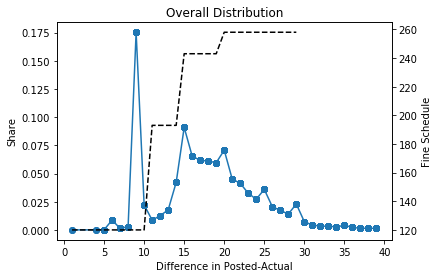

In [386]:
full_data=merge.copy()
full_data["actual"]=full_data["actual"].replace('', np.nan)
full_data["posted"]=full_data["posted"].replace('', np.nan)
full_data["diff"]=full_data["actual"].astype("float")-full_data["posted"].astype("float")
full_data=full_data.dropna(subset=["diff"])
full_data["ones"]=1 
full_data["share"]=full_data["ones"].groupby(full_data["diff"]).transform("sum")
full_data["share"]=full_data["share"]/full_data.shape[0]
full_data.sort_values(by=['diff'], inplace=True)


full_data=full_data[full_data["diff"]<40]

fig, ax = plt.subplots(1,1)

ax.plot(full_data["diff"].astype(float), full_data["share"], '-o', label="All Stops- All Data")

ax0 = ax.twinx()
ax0.plot(fine_schedule[:,0], fine_schedule[:,1], '--', c="black" )
ax0.set_ylabel("Fine Schedule")
ax0.set_title('Overall Distribution')

ax.set_xlabel("Difference in Posted-Actual")
ax.set_ylabel("Share")



#### Graphs Showing Distribution 

In [388]:
def dist_graphs(condition, specific=None):
    
    all_voter3=all_voter2.copy()

    dups=all_voter3[all_voter3.duplicated(['Party', condition, "race_voter", "gender_voter"])]
    dups=dups.drop_duplicates(subset=condition, keep="first", inplace=False)

    all_voter3_dedup=  all_voter3.drop_duplicates(subset=condition, keep=False)

    ## Putting Duplicates Back in if have all the same covariates 
    all_voter3_dedup=all_voter3_dedup.append(dups)

    all_voter3_dedup.drop_duplicates(subset=condition, keep=False, inplace=True)

    merge = officer_data3.merge(all_voter3_dedup[[condition,'Party', "race_voter", "gender_voter"]], on=condition, how='inner')
    
    merge=merge[pd.notna(merge.Party)]

    merge=merge.drop_duplicates(keep=False)

    merge["actual"]=merge["actual"].replace('', np.nan)
    merge["posted"]=merge["posted"].replace('', np.nan)
    merge["diff"]=merge["actual"].astype("float")-merge["posted"].astype("float")
    merged=merge.dropna(subset=["diff"])
    print("Number of Stops: ", merged.shape[0])
    print("Percent of All Stops: ", round(100*merged.shape[0]/85110,2))
    merged["ones"]=1 
    merged["share"]=merged["ones"].groupby(merged["diff"]).transform("sum")
    merged["share"]=merged["share"]/merged.shape[0]
    merged.sort_values(by=['diff'], inplace=True)

    merged=merged[merged["diff"]<40]
    
    black_driver=merged[merged["race"]=="Black"]
    black_driver["ones"]=1 
    black_driver["share"]=black_driver["ones"].groupby(black_driver["diff"]).transform("sum")
    black_driver["share"]=black_driver["share"]/black_driver.shape[0]
    black_driver.sort_values(by=['diff'], inplace=True)

    white_driver=merged[merged["race"]=="White"]
    white_driver["ones"]=1 
    white_driver["share"]=white_driver["ones"].groupby(white_driver["diff"]).transform("sum")
    white_driver["share"]=white_driver["share"]/white_driver.shape[0]
    white_driver.sort_values(by=['diff'], inplace=True)

    
    black_officer=merged[merged["race_voter"]=="3"]
    black_officer["ones"]=1 
    black_officer["share"]=black_officer["ones"].groupby(black_officer["diff"]).transform("sum")
    black_officer["share"]=black_officer["share"]/black_officer.shape[0]
    black_officer.sort_values(by=['diff'], inplace=True)

    white_officer=merged[merged["race_voter"]=="5"]
    white_officer["ones"]=1 
    white_officer["share"]=white_officer["ones"].groupby(white_officer["diff"]).transform("sum")
    white_officer["share"]=white_officer["share"]/white_officer.shape[0]
    white_officer.sort_values(by=['diff'], inplace=True)

    male_officer=merged[merged["gender_voter"]=="M"]
    male_officer["ones"]=1 
    male_officer["share"]=male_officer["ones"].groupby(male_officer["diff"]).transform("sum")
    male_officer["share"]=male_officer["share"]/male_officer.shape[0]
    male_officer.sort_values(by=['diff'], inplace=True)

    female_officer=merged[merged["gender_voter"]=="F"]
    female_officer["ones"]=1 
    female_officer["share"]=female_officer["ones"].groupby(female_officer["diff"]).transform("sum")
    female_officer["share"]=female_officer["share"]/female_officer.shape[0]
    female_officer.sort_values(by=['diff'], inplace=True)
    
    Dems=merged[merged["Party"]=="DEM"]
    Dems["ones"]=1 
    Dems["share"]=Dems["ones"].groupby(Dems["diff"]).transform("sum")
    Dems["share"]=Dems["share"]/Dems.shape[0]
    Dems.sort_values(by=['diff'], inplace=True)

    Reps=merged[merged["Party"]=="REP"]
    Reps["ones"]=1 
    Reps["share"]=Reps["ones"].groupby(Reps["diff"]).transform("sum")
    Reps["share"]=Reps["share"]/Reps.shape[0]
    Reps.sort_values(by=['diff'], inplace=True)
    if specific==None: 
        fig, ax = plt.subplots(1,5, figsize=(100,25))

        ax[0].plot(merged["diff"].astype(float), merged["share"], '-o', label="All Stops")

        ax0 = ax[0].twinx()
        ax0.plot(fine_schedule[:,0], fine_schedule[:,1], '--', c="black" )
        ax0.set_ylabel("Fine Schedule",  fontsize=44)

        ax[1].plot(black_driver["diff"].astype(float), black_driver["share"], '-o', label="Black Driver", c="g")
        ax[1].plot(white_driver["diff"].astype(float), white_driver["share"], '-o', label="White Driver", c="y")

        ax1 = ax[1].twinx()
        ax1.plot(fine_schedule[:,0], fine_schedule[:,1], '--', c="black" )
        ax1.set_ylabel("Fine Schedule",  fontsize=44)


        ax[2].plot(Dems["diff"].astype(float), Dems["share"], '-o', label="Democrat", c="b")
        ax[2].plot(Reps["diff"].astype(float), Reps["share"], '-o', label="Republican", c="r")

        ax2 = ax[2].twinx()
        ax2.plot(fine_schedule[:,0], fine_schedule[:,1], '--', c="black" )
        ax2.set_ylabel("Fine Schedule",  fontsize=44)

        ax[3].plot(black_officer["diff"].astype(float), black_officer["share"], '-o', label="Black Officer", c="g")
        ax[3].plot(white_officer["diff"].astype(float), white_officer["share"], '-o', label="White Officer", c="y")

        ax3 = ax[3].twinx()
        ax3.plot(fine_schedule[:,0], fine_schedule[:,1], '--', c="black" )
        ax3.set_ylabel("Fine Schedule",  fontsize=44)

        ax[4].plot(male_officer["diff"].astype(float), male_officer["share"], '-o', label="Male Officer", c="orange")
        ax[4].plot(female_officer["diff"].astype(float), female_officer["share"], '-o', label="Female Officer", c="b")

        ax4 = ax[4].twinx()
        ax4.plot(fine_schedule[:,0], fine_schedule[:,1], '--', c="black" )
        ax4.set_ylabel("Fine Schedule",  fontsize=44)


        ax[0].set_title('Overall Distribution', fontsize=54)
        ax[1].set_title('Black vs. White Driver Distribution', fontsize=54)
        ax[2].set_title('Republican vs. Democrat Officer', fontsize=54)
        ax[3].set_title('Black vs. White Officer', fontsize=54)
        ax[4].set_title('Male vs. Female Officer', fontsize=54)

        ax[0].set_xlabel("Difference in Posted-Actual", fontsize=44)
        ax[0].set_ylabel("Share", fontsize=44)
        ax[1].set_xlabel("Difference in Posted-Actual", fontsize=44)
        ax[1].set_ylabel("Share", fontsize=44)
        ax[2].set_xlabel("Difference in Posted-Actual", fontsize=44)
        ax[2].set_ylabel("Share", fontsize=44)
        ax[3].set_xlabel("Difference in Posted-Actual", fontsize=44)
        ax[3].set_ylabel("Share", fontsize=44)
        ax[4].set_xlabel("Difference in Posted-Actual", fontsize=44)
        ax[4].set_ylabel("Share", fontsize=44)

        ax[1].legend(loc=7, prop={'size': 40})
        ax[2].legend(loc=7, prop={'size': 40})
        ax[3].legend(loc=7, prop={'size': 40})
        ax[4].legend(loc=7, prop={'size': 40})
        
    return fig

Number of Stops:  30211
Percent of All Stops:  35.5


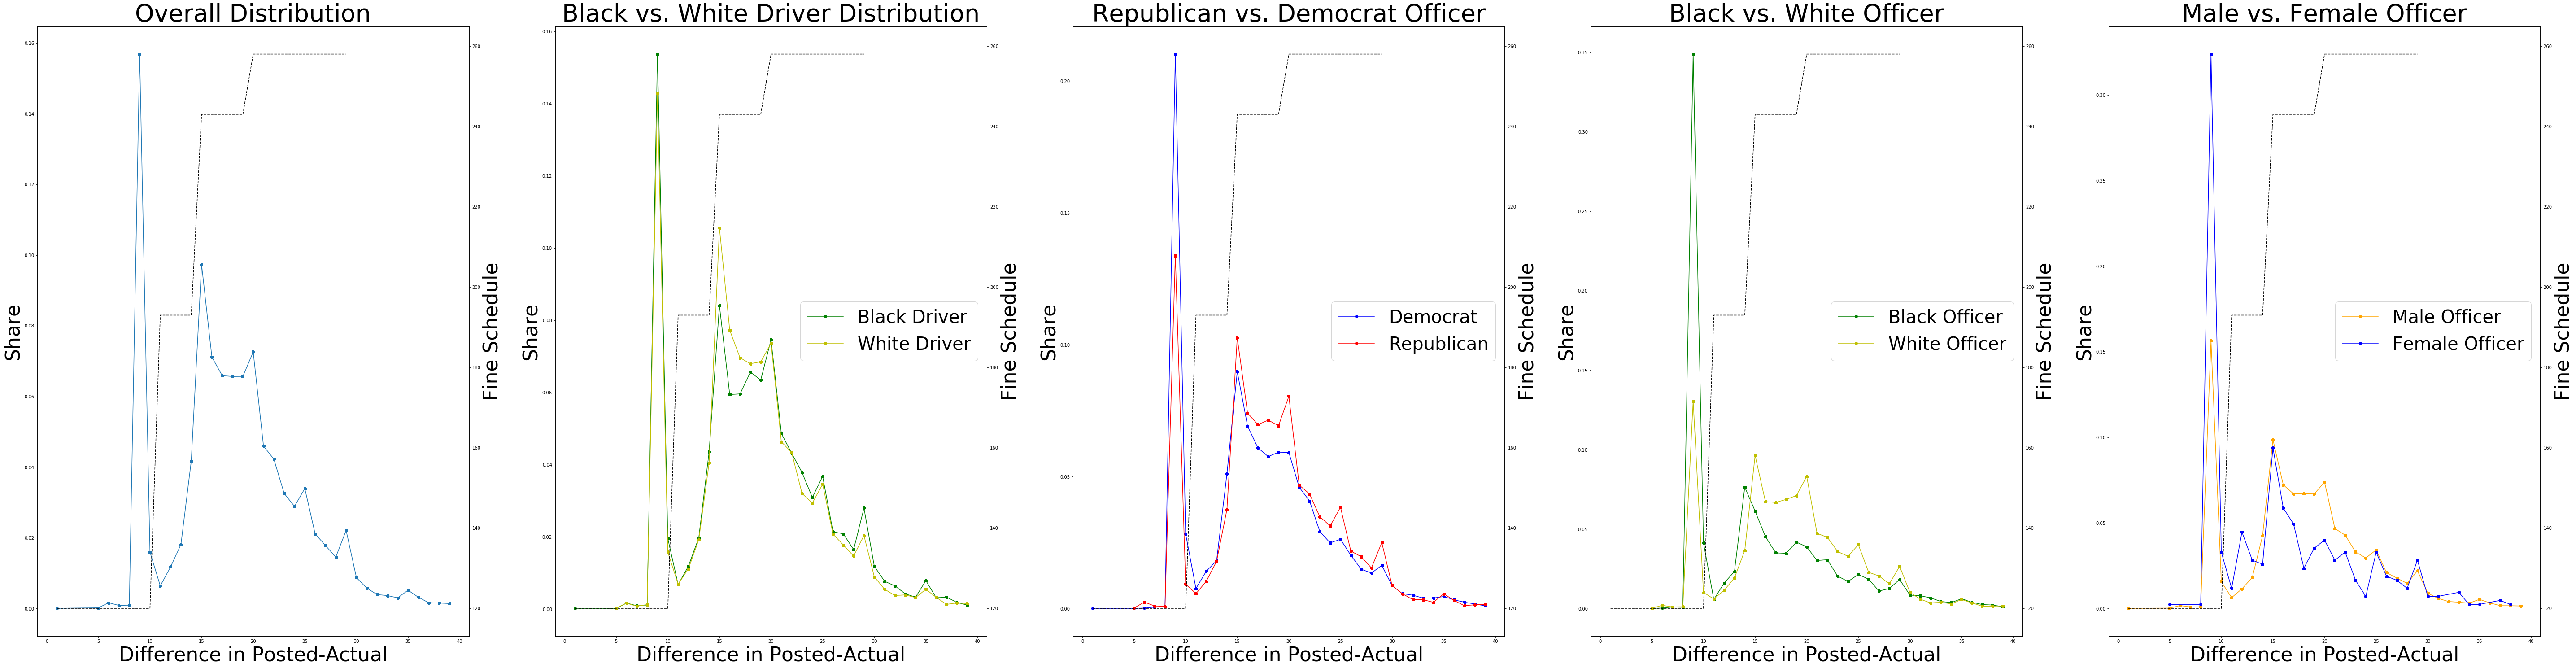

In [389]:
first_last=dist_graphs("first_last")

Number of Stops:  15245
Percent of All Stops:  17.91


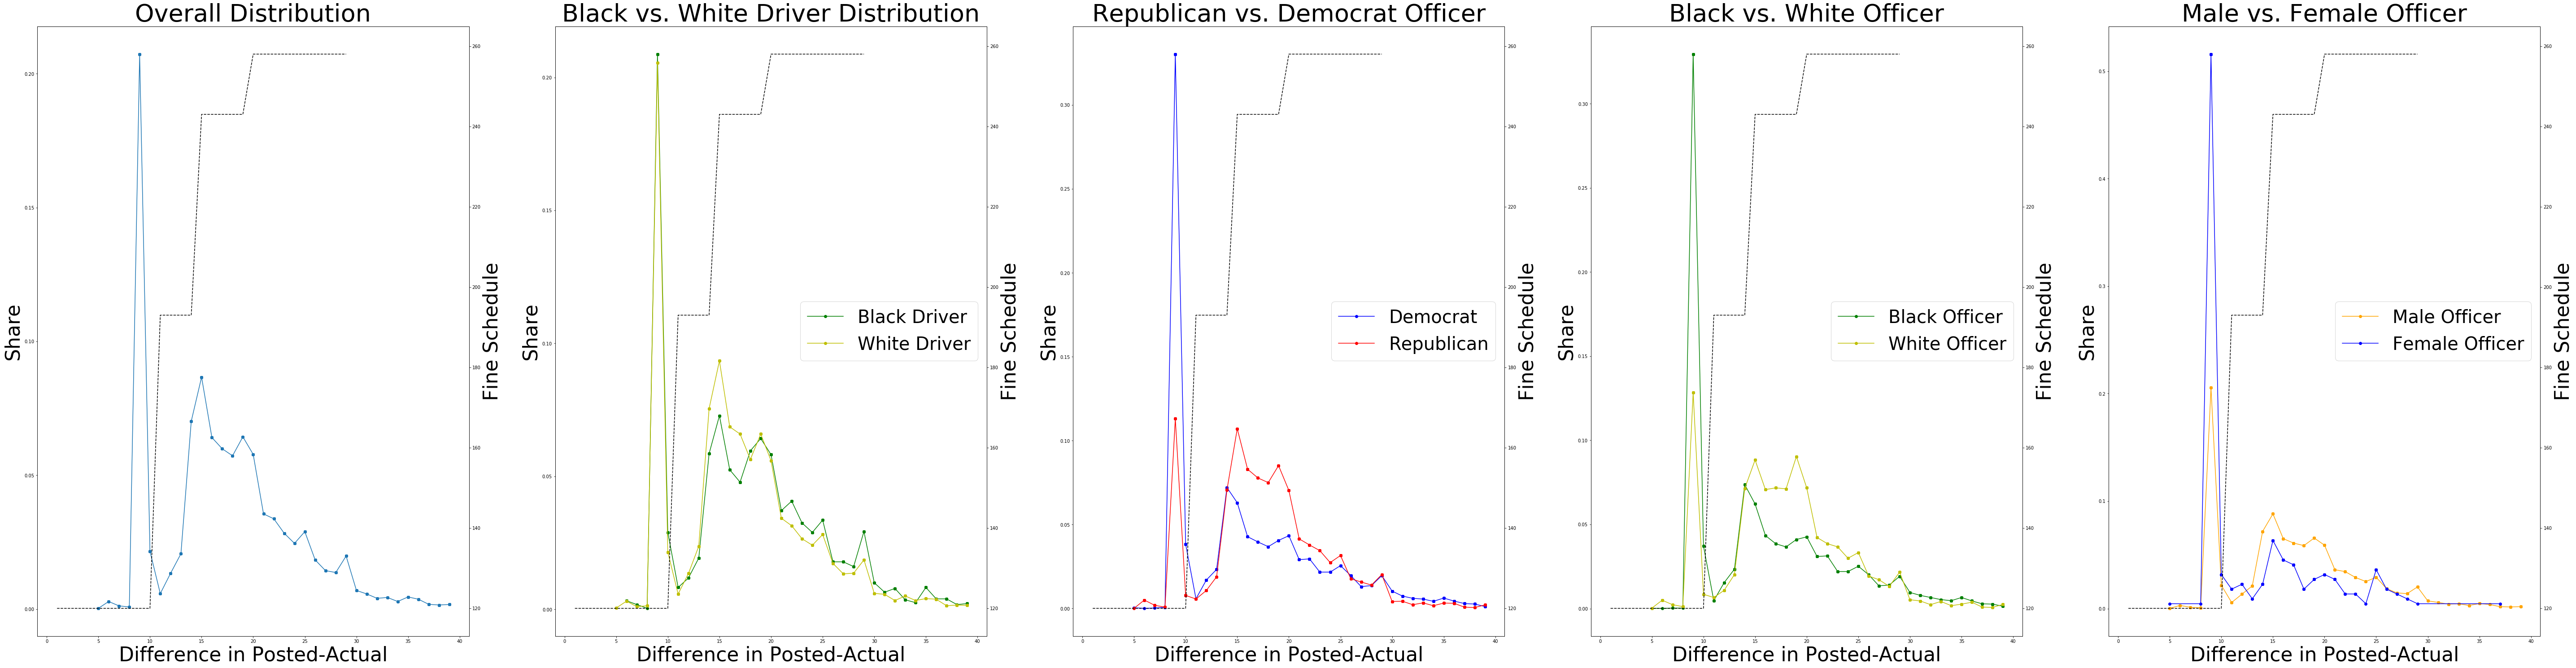

In [390]:
first_last_middleint=dist_graphs("first_last_middleinit")

Number of Stops:  7418
Percent of All Stops:  8.72


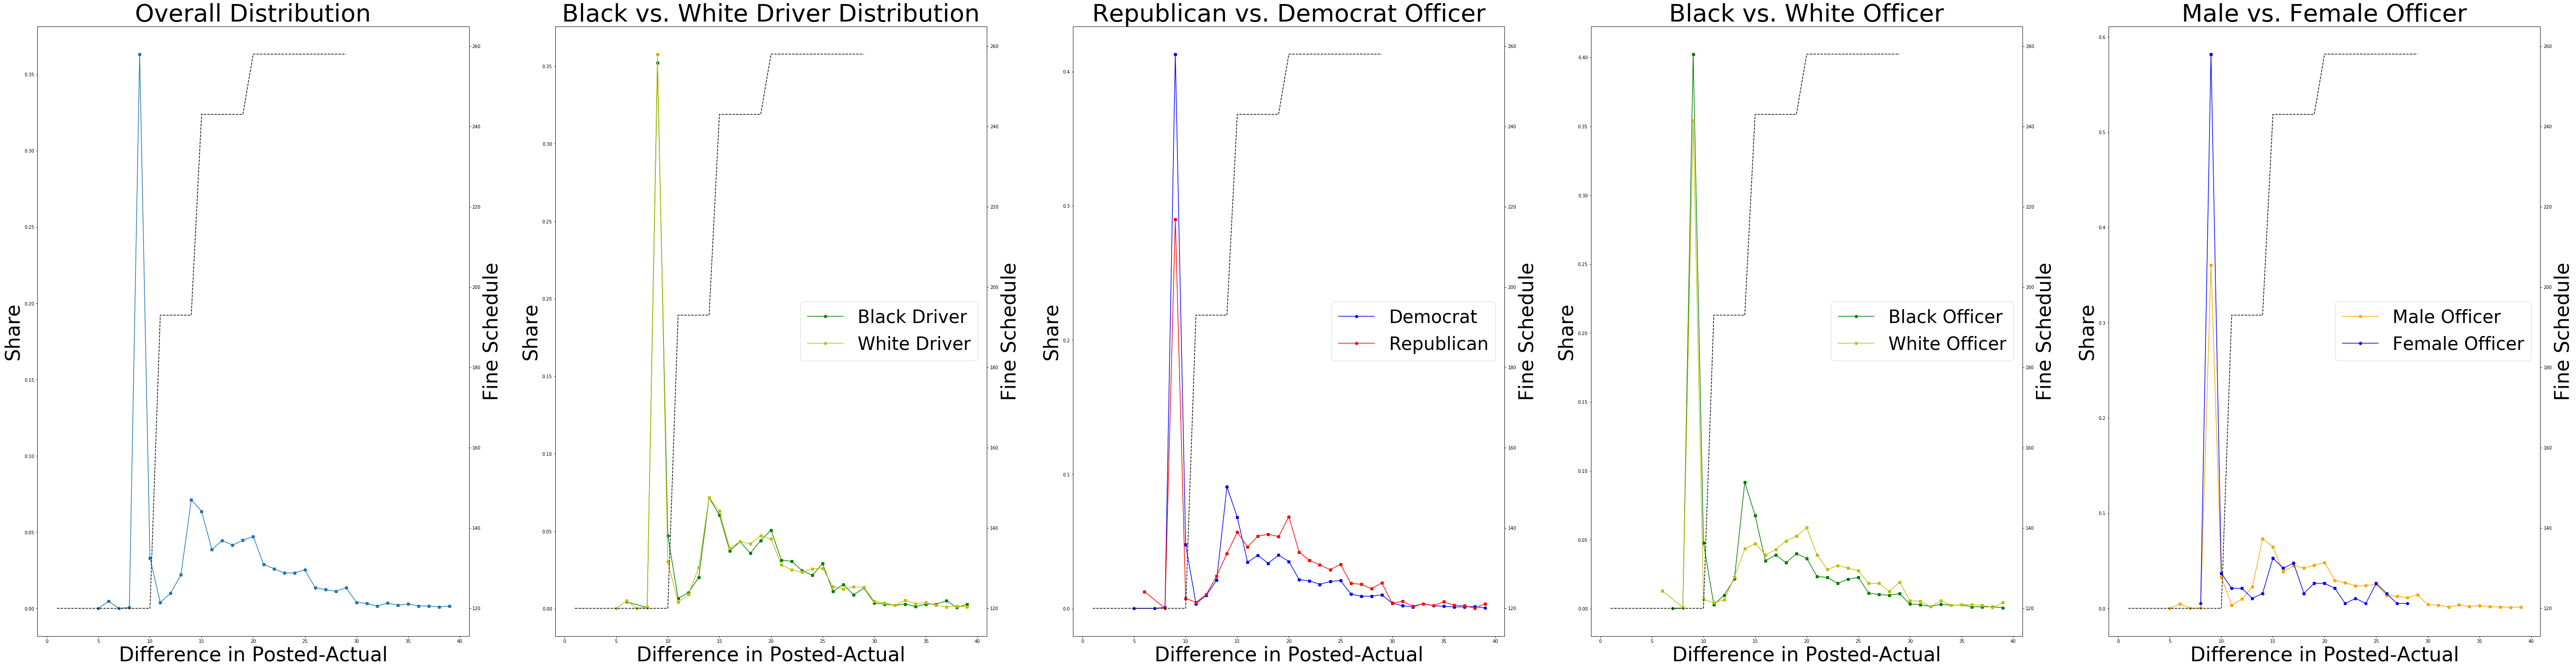

In [391]:
first_last_middle=dist_graphs("first_last_middle")

Number of Stops:  2082
Percent of All Stops:  2.45


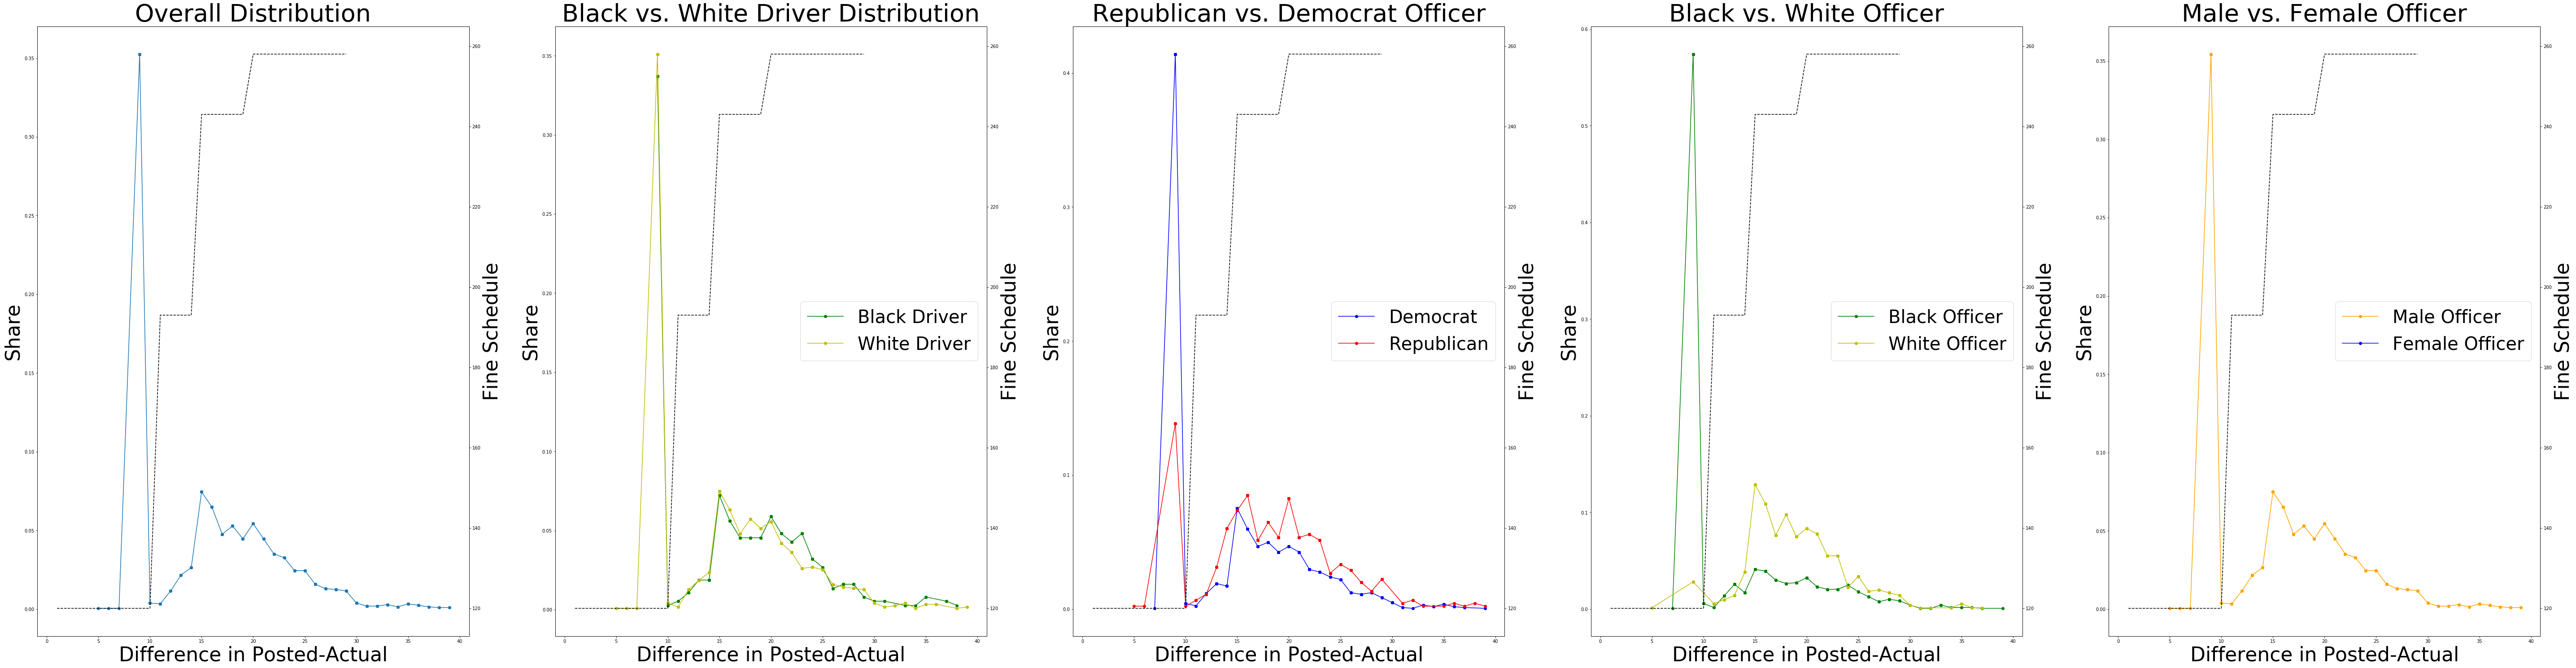

In [392]:
first_last_suffix=dist_graphs("first_last_middleinit_suffix")

### Follow-up regarding privacy

To really assess how we could provide a suggestion to better de-identify the data, we tried to assess the level of k-anonimity in the data.

**Unique officers by agency, gender, and race**

In [396]:
condition="first_last"
all_voter3=all_voter2.copy()

dups=all_voter3[all_voter3.duplicated(['Party', condition, "race_voter", "gender_voter"])]
dups=dups.drop_duplicates(subset=condition, keep="first", inplace=False)

all_voter3_dedup=  all_voter3.drop_duplicates(subset=condition, keep=False)

    ## Putting Duplicates Back in if have all the same covariates 
all_voter3_dedup=all_voter3_dedup.append(dups)

all_voter3_dedup.drop_duplicates(subset=condition, keep=False, inplace=True)

merge = officer_data3.merge(all_voter3_dedup[[condition,'Party', "race_voter", "gender_voter"]], on=condition, how='inner')
    
merge=merge[pd.notna(merge.Party)]

merge=merge.drop_duplicates(keep=False)

merge["actual"]=merge["actual"].replace('', np.nan)
merge["posted"]=merge["posted"].replace('', np.nan)
merge["diff"]=merge["actual"].astype("float")-merge["posted"].astype("float")
merged=merge.dropna(subset=["diff"])
print("Number of Stops: ", merged.shape[0])
print("Percent of All Stops: ", round(100*merged.shape[0]/85110,2))
merged["ones"]=1 


unique=merged.groupby(["Law Enf Agency Name", "gender_voter", "race_voter"]).size().reset_index(name='count')
unique[unique["count"]<3]

Number of Stops:  30211
Percent of All Stops:  35.5


Law Enf Agency Name gender_voter race_voter  count
7                 FLORIDA HIGHWAY PATROL            U          5      1
11  Hillsborough County Sheriff's Office            M          2      1
15  Hillsborough County Sheriff's Office            M          6      2
27               Tampa Police Department            M          9      1

In [398]:
merged.gender_voter.value_counts()

M    29622
F      434
U      155
Name: gender_voter, dtype: int64

In [399]:
merged.race_voter.value_counts()

5    18903
3     5862
4     5030
2      222
9      170
7       22
6        2
Name: race_voter, dtype: int64

In [413]:
driver_stats=officer_data3.groupby(["race", "gender", "zipcode"]).size().reset_index(name='count')


In [414]:
driver_stats["count"].value_counts()

1       9642
2       2961
3       1277
4        811
5        500
        ... 
2409       1
392        1
424        1
504        1
1503       1
Name: count, Length: 470, dtype: int64

In [415]:
driver_stats=officer_data3.groupby(["race", "gender"]).size().reset_index(name='count')
driver_stats["count"].value_counts()

26622    1
45149    1
15065    1
216      1
4785     1
57264    1
54831    1
28877    1
2443     1
93513    1
3876     1
2279     1
37073    1
355      1
Name: count, dtype: int64